<a href="https://colab.research.google.com/github/rbrabusa/cmpt3830_alpaca/blob/ram/cmpt3830_phase_1_go_auto.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#  Loyalty-Driven Dealer Performer Analysis
## GO Auto Services - Exploratory Data Analysis

**Team Members:**

Manpreet - mloyal@norquest.ca
Ramon - rrabusa@norquest.ca
Kiran - kkaur707@norquest.ca

### Problem Statement: Loyalty-Driven Dealer Performance (Clustering + Comparative Analysis)

#### Goal: Analyze how loyalty program participation impacts dealership performance and customer behavior. The objective is to identify whether dealerships with higher loyalty card usage show stronger retention, higher average gross revenue, and more consistent service activity compared to those with lower adoption rates.

#### Use Cases:
- Loyalty Impact by Dealer: Compare dealerships to see which locations benefit most from loyalty card usage (e.g., higher repeat visits, higher average cost per service).
- Customer Segmentation by Loyalty: Cluster customers into groups such as “loyalty-driven repeat clients,” “occasional users,” and “non-loyalty walk-ins,” and compare their service patterns across dealerships.
- Dealer benchmarking: Evaluate whether dealerships with high loyalty participation also outperform in revenue, retention, and service frequency compared to those with low participation
- Distance Insights: Explore if loyalty members are more willing to travel longer distances to specific dealerships


#### Outcome:
- Clusters of dealerships grouped by loyalty adoption and performance.
- Customer segments showing different loyalty-driven behaviors.
- A performance dashboard that highlights which dealerships use loyalty effectively and which may need support.
- Actionable recommendations for leadership on how to leverage the loyalty program to improve dealer performance, customer retention, and revenue.


### Demo 1 Objectives
1. Assess data quality and understand loyalty program distribution
2. Explore preliminary patterns in loyalty vs. non-loyalty customer behavior.
3. Conduct initial dealer-level performance comparison
4. Set foundation for clustering analysis in Demo 2

## 1. Understanding GO Auto Services

**Organization Overview:**  
GO Auto is Edmonton's premier automotive service group, operating seven dealership locations across the city. The organization's mission centers on customer retention and loyalty-driven growth, with a particular focus on maintaining customer relationships beyond the critical five-year post-purchase period.

**Business Challenge:**  
GO Auto faces significant customer attrition after the initial warranty period (typically 5 years). The leadership team seeks data-driven insights to understand how their loyalty card program impacts dealer performance, customer retention, and revenue generation.

**Services:**
- New and used vehicle sales across multiple brands (Toyota, Honda, Porsche, BMW, Nissan, Infiniti, Hyundai)
- Comprehensive service and maintenance
- Parts department
- Loyalty program with rewards and benefits

**Relevance to Project:**  
Our analysis will help GO Auto understand which dealerships effectively leverage the loyalty program, identify customer segments with different loyalty behaviors, and provide actionable recommendations for improving retention and revenue across all locations.

## 2. Dataset Description

**Data Source:** GO Auto Services Customer Database (2020-2024)  
**Records:** 242,818 service transactions  
**Dealerships:** 7 locations across Edmonton  

**Key Variables:**

| Variable | Type | Description |
|----------|------|-------------|
| `service_date` | String/Date | Date of service visit |
| `sale_date` | String/Date | Original vehicle purchase date |
| `customer_pay` | Integer | Amount paid by customer ($) |
| `warranty_pay` | Integer | Amount covered by warranty ($) |
| `year` | Integer | Vehicle manufacturing year |
| `make` | String | Vehicle manufacturer |
| `model` | String | Vehicle model |
| `vin` | Integer | Vehicle identification number (customer proxy) |
| `loyalty_card` | String | Loyalty program participation (Yes/No) |
| `cost` | String | Total service cost |
| `appointment` | Boolean | Service was scheduled (True/False) |
| `mileage` | Integer | Vehicle odometer reading |
| `dealer_name` | String | Dealership location |
| `distance` | Float | Distance customer traveled to dealership (km) |

**Data Quality Notes:**
- Cost field requires parsing (stored as string with currency symbol)
- Date fields need conversion for temporal analysis

## 3. Problem Statement

**Research Question:**  
How does loyalty program participation impact dealership performance, and what customer segments drive different loyalty behaviors across GO Auto's seven Edmonton locations?

**Specific Objectives:**

1. **Loyalty Impact Assessment:** Quantify the relationship between loyalty card adoption rates and key performance metrics (repeat visits, average revenue, customer distance traveled) across dealerships

2. **Customer Segmentation:** Identify distinct customer behavioral groups based on loyalty participation, visit frequency, spending patterns, and geographic reach

3. **Dealer Benchmarking:** Compare dealership performance in loyalty program effectiveness and determine which locations show the strongest correlation between loyalty adoption and business outcomes

4. **Geographic Analysis:** Evaluate whether loyalty program members demonstrate different travel distance patterns, indicating program value perception

**Business Alignment:**  
This analysis directly addresses GO Auto's strategic priority of improving customer retention beyond the five-year mark by providing evidence-based insights into which dealers excel at leveraging loyalty programs and which customer segments represent the highest-value retention opportunities.

## 4. Data Loading and Initial Inspection

**Sprint 1 Task S1-1:** Load and inspect GO Auto dataset  
**Assigned:** Team | **Status:** Complete

In [13]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

# Set visualization defaults
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")
%matplotlib inline

# Display settings
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)
pd.set_option('display.width', 1000)

print("Libraries loaded successfully")
print(f"Pandas version: {pd.__version__}")
print(f"NumPy version: {np.__version__}")

Libraries loaded successfully
Pandas version: 2.2.2
NumPy version: 2.0.2


In [14]:
# Load dataset
df = pd.read_csv('GoAutoServices.csv')

print("DATASET LOADED SUCCESSFULLY")
print(f"\nTotal Records: {len(df_work):,}")
print(f"Total Features: {len(df_work.columns)}")
print(f"\nDataset Shape: {df_work.shape}")

DATASET LOADED SUCCESSFULLY

Total Records: 242,814
Total Features: 15

Dataset Shape: (242814, 15)


In [15]:
# Display first few records
print("SAMPLE RECORDS (First 5)")
df.head()

SAMPLE RECORDS (First 5)


,service_date,sale_date,customer_pay,warranty_pay,year,make,model,vin,loyalty_card,cost,appointment,mileage,dealer_name,distance
0,7/29/2024 0:00,21-Apr,1,0,2021,TOYO,RAV4HY,3395527356,Yes,200-300,True,39076,Toyota on the Trail,9.0
1,7/30/2024 0:00,23-Dec,1,1,2024,TOYO,RAV4HY,5296888873,Yes,0-100,True,39556,Toyota on the Trail,12.0
2,7/2/2024 0:00,20-Mar,1,1,2020,LAND,RR,9475224721,No,1300-1400,True,66001,Jaguar Land Rover Edmonton,10.8
3,7/3/2024 0:00,23-Jul,1,1,2018,NISS,PATH,3446880696,No,500-600,True,82454,Go Nissan South,15.3
4,10/30/2022 0:00,11-May,1,0,2008,FORD,FUSN,5577514554,No,0-100,True,5,Kentwood Ford,4.8


In [16]:
# Display basic information
print("DATASET INFORMATION")
df.info()

DATASET INFORMATION
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 242818 entries, 0 to 242817
Data columns (total 14 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   service_date  242818 non-null  object 
 1   sale_date     242818 non-null  object 
 2   customer_pay  242818 non-null  int64  
 3   warranty_pay  242818 non-null  int64  
 4   year          242818 non-null  int64  
 5   make          242818 non-null  object 
 6   model         242818 non-null  object 
 7   vin           242818 non-null  int64  
 8   loyalty_card  242813 non-null  object 
 9   cost          240095 non-null  object 
 10  appointment   242818 non-null  bool   
 11  mileage       242818 non-null  int64  
 12  dealer_name   242818 non-null  object 
 13  distance      242818 non-null  float64
dtypes: bool(1), float64(1), int64(5), object(7)
memory usage: 24.3+ MB


In [17]:
# Statistical summary
print("STATISTICAL SUMMARY")
df.describe()

STATISTICAL SUMMARY


,customer_pay,warranty_pay,year,vin,mileage,distance
count,242818.000000,242818.000000,242818.000000,2.428180e+05,2.428180e+05,242818.000000
mean,0.841910,0.382365,2018.015135,5.508742e+09,6.689293e+04,43.090641
std,0.364826,0.485966,3.187028,2.587574e+09,6.255440e+04,155.906911
min,0.000000,0.000000,1985.000000,1.000168e+09,0.000000e+00,0.000000
25%,1.000000,0.000000,2016.000000,3.277858e+09,2.398500e+04,5.800000
50%,1.000000,0.000000,2018.000000,5.532262e+09,5.212800e+04,10.600000
75%,1.000000,1.000000,2020.000000,7.728695e+09,9.496775e+04,18.900000
max,1.000000,1.000000,2025.000000,9.999990e+09,1.000000e+07,4212.200000


### 4.1 Create Working Copy of Dataset

In [18]:
print("CREATING WORKING COPY OF DATASET \n")

# Store original for reference
df_original = df.copy()

# Create working copy for transformations
df_work = df.copy()

print(f"\n✓ Original dataset preserved as 'df_original'")
print(f"✓ Working copy created as 'df_work'")
print(f"\nDataset Details:")
print(f"  Records: {len(df_work):,}")
print(f"  Features: {len(df_work.columns)}")
print(f"  Memory: {df_work.memory_usage(deep=True).sum() / 1024**2:.2f} MB")

print(f"\nAll subsequent operations will use 'df_work'")
print(f"Original data remains untouched in 'df_original'")

CREATING WORKING COPY OF DATASET 


✓ Original dataset preserved as 'df_original'
✓ Working copy created as 'df_work'

Dataset Details:
  Records: 242,818
  Features: 14
  Memory: 103.01 MB

All subsequent operations will use 'df_work'
Original data remains untouched in 'df_original'


## 5. Data Quality Assessment

**Sprint 1 Task S1-2:** Clean and preprocess data  
**Assigned:** Kirandeep | **Status:** Complete

### 5.1 Handling Duplicates

In [19]:
# check for duplicates
dups = df_work.duplicated().sum()
print("DUPLICATE RECORDS ANALYSIS")
print(f"duplicate rows: {dups}")
print(f"percentage: {(dups/len(df_work)*100):.2f}%")

if dups > 0:
    print("found some duplicates - might want to look into this")

DUPLICATE RECORDS ANALYSIS
duplicate rows: 4
percentage: 0.00%
found some duplicates - might want to look into this


Decision tree for duplicates:

- if exact duplicates: Drop them
- if same VIN, same service_date: Flag
- if same VIN, different dates: Keep (legitimate customers)

In [20]:
# implement duplicate handling strategy

original_size = len(df_work)

# STEP 1: Drop exact duplicates only
print("\n1. Removing exact duplicates:")
before_drop = len(df_work)
df_work = df_work.drop_duplicates()
print(f"   Dropped: {before_drop - len(df_work)} exact duplicate records")
print(f"   Remaining: {len(df_work)} records")

# STEP 2: Flag same-day multiple services for transparency
print("\n2. Flagging same-day multiple services:")
df_work['same_day_multi_service'] = df_work.duplicated(subset=['vin', 'service_date'], keep=False)
multi_service_count = df_work['same_day_multi_service'].sum()
print(f"   Flagged: {multi_service_count} records ({multi_service_count/len(df_work)*100:.2f}%)")
print(f"   These represent customers who received multiple services same day")

# STEP 3: Create summary for documentation
print("\n3. Summary:")
print(f"   Original records: {original_size}")
print(f"   After deduplication: {len(df_work)}")
print(f"   Records dropped: {original_size - len(df_work)} ({(original_size-len(df_work))/original_size*100:.4f}%)")
print(f"   Multi-service flags: {multi_service_count}")

# STEP 4: Validate we kept legitimate multiple services
print("\n4. Validation - checking payment pattern diversity:")
multi_service_records = df_work[df_work['same_day_multi_service']]
if len(multi_service_records) > 0:
    # Group by VIN+date and check payment diversity
    payment_diversity = multi_service_records.groupby(['vin', 'service_date']).apply(
        lambda x: (x['customer_pay'].nunique() > 1) or (x['warranty_pay'].nunique() > 1),
        include_groups=False
    )
    print(f"   Multi-service with DIFFERENT payment types: {payment_diversity.sum()} (legitimate bundling)")
    print(f"   Multi-service with SAME payment types: {len(payment_diversity) - payment_diversity.sum()} (flagged for review)")



1. Removing exact duplicates:
   Dropped: 4 exact duplicate records
   Remaining: 242814 records

2. Flagging same-day multiple services:
   Flagged: 7788 records (3.21%)
   These represent customers who received multiple services same day

3. Summary:
   Original records: 242818
   After deduplication: 242814
   Records dropped: 4 (0.0016%)
   Multi-service flags: 7788

4. Validation - checking payment pattern diversity:
   Multi-service with DIFFERENT payment types: 3088 (legitimate bundling)
   Multi-service with SAME payment types: 775 (flagged for review)


We identified 7788 same-day visits across customers, which shows a positive result that there is high engagement with service center.

So only 4 true duplicates were removed.

### 5.2 Handling Missing Values

In [21]:
# check missing values
print("MISSING VALUES ANALYSIS")

missing = df_work.isnull().sum()
missing_pct = (df_work.isnull().sum() / len(df_work) * 100).round(2)

# only show columns that have missing values
for col in df_work.columns:
    if missing[col] > 0:
        print(f"{col}: {missing[col]} ({missing_pct[col]}%)")

if missing.sum() == 0:
    print("No missing values!")

MISSING VALUES ANALYSIS
loyalty_card: 5 (0.0%)
cost: 2723 (1.12%)


In [22]:
# deep dive into missing value patterns
print("MISSING VALUE PATTERN ANALYSIS")

# loyalty_card analysis
print("\n1. LOYALTY_CARD (5 missing = 0.002%)")
missing_loyalty = df_work[df_work['loyalty_card'].isna()]
print(f"   Only {len(missing_loyalty)} records out of {len(df_work)}")
print(f"   Current distribution: Yes={len(df_work[df_work['loyalty_card']=='Yes'])} ({len(df_work[df_work['loyalty_card']=='Yes'])/len(df_work)*100:.1f}%)")
print(f"   Current distribution: No={len(df_work[df_work['loyalty_card']=='No'])} ({len(df_work[df_work['loyalty_card']=='No'])/len(df_work)*100:.1f}%)")

# cost analysis
print("\n2. COST (2723 missing = 1.12%)")
missing_cost = df_work[df_work['cost'].isna()]
print(f"   Total missing: {len(missing_cost)} records")
print(f"\n   KEY INSIGHT: Missing cost strongly correlates with WARRANTY services")
print(f"   When cost is MISSING:")
print(f"     - Warranty paid: {(missing_cost['warranty_pay']==1).sum()} ({(missing_cost['warranty_pay']==1).sum()/len(missing_cost)*100:.1f}%)")
print(f"     - Customer paid: {(missing_cost['customer_pay']==1).sum()} ({(missing_cost['customer_pay']==1).sum()/len(missing_cost)*100:.1f}%)")
print(f"\n   When cost is PRESENT:")
has_cost = df_work[df_work['cost'].notna()]
print(f"     - Warranty paid: {(has_cost['warranty_pay']==1).sum()} ({(has_cost['warranty_pay']==1).sum()/len(has_cost)*100:.1f}%)")
print(f"     - Customer paid: {(has_cost['customer_pay']==1).sum()} ({(has_cost['customer_pay']==1).sum()/len(has_cost)*100:.1f}%)")

print(f"\n   Dealer breakdown for missing cost:")
print(missing_cost['dealer_name'].value_counts())


MISSING VALUE PATTERN ANALYSIS

1. LOYALTY_CARD (5 missing = 0.002%)
   Only 5 records out of 242814
   Current distribution: Yes=42974 (17.7%)
   Current distribution: No=199835 (82.3%)

2. COST (2723 missing = 1.12%)
   Total missing: 2723 records

   KEY INSIGHT: Missing cost strongly correlates with WARRANTY services
   When cost is MISSING:
     - Warranty paid: 2236 (82.1%)
     - Customer paid: 610 (22.4%)

   When cost is PRESENT:
     - Warranty paid: 90608 (37.7%)
     - Customer paid: 203817 (84.9%)

   Dealer breakdown for missing cost:
dealer_name
Norden Volkswagen             1233
Toyota on the Trail            931
Go Nissan South                268
Go Honda                       117
Jaguar Land Rover Edmonton     115
Kentwood Ford                   32
Porsche Centre Edmonton         27
Name: count, dtype: int64


LOYALTY_CARD (5 missing = 0.002%)

COST (2723 missing = 1.12%)

For loyalty_card: We can drop these rows are they show minimal impact for our analysis but we still must consider if it will be critical for our analysis.

For cost:
- we can impute as cost (Min max) normalization
- as most of the non-missing costs match this formula
- we will need the service cost for phase 2 clustering

Our Approach for Missing Values

1. Impute based on payment type
2. For remaining missing, use dealer specific median
3. Create flag for imputed values

In [23]:
# implement missing value strategy
print("IMPLEMENTING MISSING VALUE STRATEGY")

# track original size
original_size = len(df_work)

# STRATEGY 1: Drop loyalty_card missing (5 records)
print("\n1. Handling loyalty_card:")
before_loyalty = len(df_work)
df_work = df_work.dropna(subset=['loyalty_card'])
print(f"   Dropped {before_loyalty - len(df_work)} records with missing loyalty_card")
print(f"   Remaining: {len(df_work)} records")

# STRATEGY 2: Impute cost based on payment patterns
print("\n2. Handling cost:")
missing_cost_count = df_work['cost'].isna().sum()
print(f"   Total missing cost: {missing_cost_count}")

# create imputation flag BEFORE imputing
df_work['cost_imputed'] = df_work['cost'].isna()

# Step 2a: Warranty services get '0-100' (most warranty work is low/no cost to customer)
warranty_missing = df_work['cost'].isna() & (df_work['warranty_pay'] == 1)
df_work.loc[warranty_missing, 'cost'] = '0-100'
print(f"   Imputed {warranty_missing.sum()} warranty services as '0-100'")

# Step 2b: For remaining (customer-pay), we'll handle after parsing cost
# (need cost_avg calculated first)
still_missing = df_work['cost'].isna().sum()
print(f"   Remaining missing after warranty imputation: {still_missing}")

print(f"\n3. Summary:")
print(f"   Original records: {original_size}")
print(f"   After cleaning: {len(df_work)}")
print(f"   Records lost: {original_size - len(df_work)} ({(original_size-len(df_work))/original_size*100:.3f}%)")
print(f"   Cost imputation flag created: {df_work['cost_imputed'].sum()} records flagged")


IMPLEMENTING MISSING VALUE STRATEGY

1. Handling loyalty_card:
   Dropped 5 records with missing loyalty_card
   Remaining: 242809 records

2. Handling cost:
   Total missing cost: 2723
   Imputed 2236 warranty services as '0-100'
   Remaining missing after warranty imputation: 487

3. Summary:
   Original records: 242814
   After cleaning: 242809
   Records lost: 5 (0.002%)
   Cost imputation flag created: 2723 records flagged


### 5.3 Handling Data Types

Current Issues:
- service_date: string needs datetime conversion
- sale_date: string with NO YEAR ('21-Apr') limited conversion options
- year: int64 but represents vehicle model year
- make/model: strings that need categorical encoding for Phase 2
- VIN: int64 (10 digits) keep as-is, used for grouping not math
- loyalty_card: 'Yes'/'No'  convert to binary for clustering

In [24]:
# data types
print("data type counts:")
print(df_work.dtypes.value_counts())
print("\nall columns:")
print(df_work.dtypes)

data type counts:
object     7
int64      5
bool       3
float64    1
Name: count, dtype: int64

all columns:
service_date               object
sale_date                  object
customer_pay                int64
warranty_pay                int64
year                        int64
make                       object
model                      object
vin                         int64
loyalty_card               object
cost                       object
appointment                  bool
mileage                     int64
dealer_name                object
distance                  float64
same_day_multi_service       bool
cost_imputed                 bool
dtype: object


In [25]:
# data type conversions
print("DATA TYPE CONVERSIONS")

# 1. Convert service_date to datetime
print("\n1. Converting service_date to datetime:")
df_work['service_date'] = pd.to_datetime(df_work['service_date'], format='%m/%d/%Y %H:%M', errors='coerce')
invalid_dates = df_work['service_date'].isna().sum()
print(f"   Converted: {len(df_work) - invalid_dates} records")
print(f"   Invalid dates: {invalid_dates}")
if invalid_dates > 0:
    print(f"   Note: {invalid_dates} records have invalid dates (will handle separately)")

# Extract useful date components
df_work['service_year'] = df_work['service_date'].dt.year
df_work['service_month'] = df_work['service_date'].dt.month
df_work['service_quarter'] = df_work['service_date'].dt.quarter
df_work['service_dayofweek'] = df_work['service_date'].dt.dayofweek  # 0=Monday, 6=Sunday
print(f"   Extracted: year, month, quarter, day_of_week")

# 2. Handle sale_date (day-month only, no year)
print("\n2. Handling sale_date (limited - no year available):")
print(f"   Format: 'dd-MMM' (e.g., '21-Apr', '23-Dec')")
print(f"   Limitation: Cannot convert to full datetime without year")
print(f"   Solution: Extract month for seasonal purchase analysis")

# Extract just the month
df_work['sale_month'] = pd.to_datetime(df_work['sale_date'], format='%d-%b', errors='coerce').dt.month
print(f"   Extracted sale_month: {df_work['sale_month'].notna().sum()} records")
print(f"   Sale month distribution:")
print(df_work['sale_month'].value_counts().sort_index())

# 3. Keep year as int64 (it's vehicle model year)
print("\n3. Vehicle year field:")
print(f"   Type: {df_work['year'].dtype}")
print(f"   Range: {df_work['year'].min()} to {df_work['year'].max()}")
print(f"   Note: This is vehicle MODEL year, keeping as int64")

# 4. VIN - keep as int64 for grouping
print("\n4. VIN (vehicle identifier):")
print(f"   Type: {df_work['vin'].dtype}")
print(f"   All VINs are 10 digits: {df_work['vin'].astype(str).str.len().unique()}")
print(f"   Note: Keeping as int64 (used for grouping, not arithmetic)")

# 5. Make and model - keep as strings for now, encode later
print("\n5. Make and Model:")
print(f"   make: {df_work['make'].dtype}, {df_work['make'].nunique()} unique brands")
print(f"   model: {df_work['model'].dtype}, {df_work['model'].nunique()} unique models")
print(f"   Note: Will use label encoding or one-hot for Phase 2 clustering")

print("\n6. Summary of conversions:")
print(f"   ✓ service_date → datetime")
print(f"   ✓ sale_date → extracted sale_month only")
print(f"   ✓ Created: service_year, service_month, service_quarter, service_dayofweek")
print(f"   ✓ Kept year, VIN, make, model as-is")

DATA TYPE CONVERSIONS

1. Converting service_date to datetime:
   Converted: 242808 records
   Invalid dates: 1
   Note: 1 records have invalid dates (will handle separately)
   Extracted: year, month, quarter, day_of_week

2. Handling sale_date (limited - no year available):
   Format: 'dd-MMM' (e.g., '21-Apr', '23-Dec')
   Limitation: Cannot convert to full datetime without year
   Solution: Extract month for seasonal purchase analysis
   Extracted sale_month: 242809 records
   Sale month distribution:
sale_month
1     17294
2     16553
3     20980
4     19131
5     21947
6     21975
7     22443
8     24515
9     22460
10    21806
11    18924
12    14781
Name: count, dtype: int64

3. Vehicle year field:
   Type: int64
   Range: 1985 to 2025
   Note: This is vehicle MODEL year, keeping as int64

4. VIN (vehicle identifier):
   Type: int64
   All VINs are 10 digits: [10]
   Note: Keeping as int64 (used for grouping, not arithmetic)

5. Make and Model:
   make: object, 66 unique brands


## 6. Feature Engineering

In [26]:
# feature engineering for clustering
print("FEATURE ENGINEERING FOR PHASE 2")
print("="*60)

# 1. Vehicle age at service
print("\n1. Vehicle age at service:")
df_work['vehicle_age'] = df_work['service_year'] - df_work['year']
print(f"   Range: {df_work['vehicle_age'].min()} to {df_work['vehicle_age'].max()} years")
print(f"   Mean: {df_work['vehicle_age'].mean():.1f} years")
print(f"   Median: {df_work['vehicle_age'].median():.1f} years")

# 2. Warranty period indicator (typical 5 years)
print("\n2. Warranty period indicator:")
df_work['under_warranty'] = (df_work['vehicle_age'] <= 5).astype(int)
print(f"   Under warranty: {df_work['under_warranty'].sum()} ({df_work['under_warranty'].sum()/len(df_work)*100:.1f}%)")
print(f"   Out of warranty: {(1-df_work['under_warranty']).sum()} ({(1-df_work['under_warranty']).sum()/len(df_work)*100:.1f}%)")
print(f"   Note: This is GO Auto's key retention challenge!")

# 3. Luxury brand indicator
print("\n3. Luxury brand classification:")
luxury_makes = ['PORS', 'JAGU', 'LAND', 'INFI', 'BMW', 'MERZ', 'AUDI', 'LEXU']
df_work['is_luxury'] = df_work['make'].isin(luxury_makes).astype(int)
print(f"   Luxury brands: {luxury_makes}")
print(f"   Luxury records: {df_work['is_luxury'].sum()} ({df_work['is_luxury'].sum()/len(df_work)*100:.1f}%)")
print(f"   Non-luxury records: {(1-df_work['is_luxury']).sum()} ({(1-df_work['is_luxury']).sum()/len(df_work)*100:.1f}%)")

# 4. Loyalty card binary
print("\n4. Loyalty card binary encoding:")
df_work['loyalty_binary'] = (df_work['loyalty_card'] == 'Yes').astype(int)
print(f"   Loyalty members: {df_work['loyalty_binary'].sum()} ({df_work['loyalty_binary'].sum()/len(df_work)*100:.1f}%)")
print(f"   Non-members: {(1-df_work['loyalty_binary']).sum()} ({(1-df_work['loyalty_binary']).sum()/len(df_work)*100:.1f}%)")

# 5. Service type categories
print("\n5. Service type categorization:")
df_work['service_type'] = 'unknown'
df_work.loc[(df_work['customer_pay']==1) & (df_work['warranty_pay']==0), 'service_type'] = 'customer_only'
df_work.loc[(df_work['customer_pay']==0) & (df_work['warranty_pay']==1), 'service_type'] = 'warranty_only'
df_work.loc[(df_work['customer_pay']==1) & (df_work['warranty_pay']==1), 'service_type'] = 'both'
df_work.loc[(df_work['customer_pay']==0) & (df_work['warranty_pay']==0), 'service_type'] = 'neither'
print(f"   Service type distribution:")
print(df_work['service_type'].value_counts())

# 6. Day of week category (weekday vs weekend)
print("\n6. Weekday vs. Weekend services:")
df_work['is_weekend'] = (df_work['service_dayofweek'] >= 5).astype(int)  # 5=Saturday, 6=Sunday
print(f"   Weekend services: {df_work['is_weekend'].sum()} ({df_work['is_weekend'].sum()/len(df_work)*100:.1f}%)")
print(f"   Weekday services: {(1-df_work['is_weekend']).sum()} ({(1-df_work['is_weekend']).sum()/len(df_work)*100:.1f}%)")

print("\n7. Summary of new features:")
new_features = ['vehicle_age', 'under_warranty', 'is_luxury', 'loyalty_binary',
                'service_type', 'is_weekend', 'service_month', 'sale_month']
print(f"   Created {len(new_features)} new features:")
for feat in new_features:
    print(f"   ✓ {feat}")

print("\n   These will be normalized and used in Phase 2 clustering!")

FEATURE ENGINEERING FOR PHASE 2

1. Vehicle age at service:
   Range: -1.0 to 35.0 years
   Mean: 4.0 years
   Median: 3.0 years

2. Warranty period indicator:
   Under warranty: 176791 (72.8%)
   Out of warranty: 66018 (27.2%)
   Note: This is GO Auto's key retention challenge!

3. Luxury brand classification:
   Luxury brands: ['PORS', 'JAGU', 'LAND', 'INFI', 'BMW', 'MERZ', 'AUDI', 'LEXU']
   Luxury records: 44603 (18.4%)
   Non-luxury records: 198206 (81.6%)

4. Loyalty card binary encoding:
   Loyalty members: 42974 (17.7%)
   Non-members: 199835 (82.3%)

5. Service type categorization:
   Service type distribution:
service_type
customer_only    149968
both              54456
warranty_only     38385
Name: count, dtype: int64

6. Weekday vs. Weekend services:
   Weekend services: 91406 (37.6%)
   Weekday services: 151403 (62.4%)

7. Summary of new features:
   Created 8 new features:
   ✓ vehicle_age
   ✓ under_warranty
   ✓ is_luxury
   ✓ loyalty_binary
   ✓ service_type
   ✓ is_we

THe cost field contains ranges rather than single values. before we can use this in the future part of the project we need to:
1. Extract numeric values from the cost ranges
2. Apply min-max normalization to prepare for algorithms

In [27]:
# extract dollar values from cost range strings
# examples: '200-300' -> min=200, max=300 | '0-100' -> min=0, max=100

def parse_cost(cost_str):
    """extract min and max dollar amounts from cost string"""
    if pd.isna(cost_str):
        return None, None

    # convert to string and clean it up
    cost_str = str(cost_str).strip()

    # check if its a range like '200-300'
    if '-' in cost_str:
        parts = cost_str.split('-')
        if len(parts) == 2:
            try:
                min_val = float(parts[0].strip())
                max_val = float(parts[1].strip())
                return min_val, max_val
            except ValueError:
                return None, None

    # if its just a single number
    try:
        val = float(cost_str)
        return val, val
    except ValueError:
        return None, None

# apply parsing to cost column
cost_parsed = df_work['cost'].apply(parse_cost)
df_work['cost_min'] = cost_parsed.apply(lambda x: x[0] if x else None)
df_work['cost_max'] = cost_parsed.apply(lambda x: x[1] if x else None)

# calculate average cost for each service (midpoint of range)
df_work['cost_avg'] = (df_work['cost_min'] + df_work['cost_max']) / 2

print("COST PARSING RESULTS")
print(f"Successfully parsed: {df_work['cost_avg'].notna().sum():,} records")
print(f"Failed to parse: {df_work['cost_avg'].isna().sum():,} records")
print(f"\nCOST STATISTICS (in dollars):")
print(f"Minimum cost: ${df_work['cost_min'].min():.2f}")
print(f"Maximum cost: ${df_work['cost_max'].max():.2f}")
print(f"Average cost: ${df_work['cost_avg'].mean():.2f}")
print(f"Median cost: ${df_work['cost_avg'].median():.2f}")

# show some examples
print("\nSAMPLE COST CONVERSIONS:")
samples = df_work[df_work['cost'].notna()][['cost', 'cost_min', 'cost_max', 'cost_avg']].head(8)
for idx, row in samples.iterrows():
    print(f"  '{row['cost']}' -> min=${row['cost_min']:.0f}, max=${row['cost_max']:.0f}, avg=${row['cost_avg']:.0f}")

COST PARSING RESULTS
Successfully parsed: 242,322 records
Failed to parse: 487 records

COST STATISTICS (in dollars):
Minimum cost: $0.00
Maximum cost: $60600.00
Average cost: $577.98
Median cost: $250.00

SAMPLE COST CONVERSIONS:
  '200-300' -> min=$200, max=$300, avg=$250
  '0-100' -> min=$0, max=$100, avg=$50
  '1300-1400' -> min=$1300, max=$1400, avg=$1350
  '500-600' -> min=$500, max=$600, avg=$550
  '0-100' -> min=$0, max=$100, avg=$50
  '200-300' -> min=$200, max=$300, avg=$250
  '100-200' -> min=$100, max=$200, avg=$150
  '100-200' -> min=$100, max=$200, avg=$150


We maintain two versions of cost data:
- cost_avg: Original dollar amounts for business analysis
- cost_normalized: Scaled [0,1] values for Phase 2 clustering

We kept both versions:
- for demo 1, we will use cost_avg
- for demo 2, use cost_normalized

In [28]:
# apply min-max normalization to cost_avg
# this prepares data for Phase 2 clustering where distance matters
# BUT we also keep the original dollar amounts for business interpretation

from sklearn.preprocessing import MinMaxScaler

# create scaler
scaler = MinMaxScaler()

# fit and transform on non-null values
cost_valid = df_work['cost_avg'].notna()

# IMPORTANT: Create normalized version for Phase 2 clustering
df_work.loc[cost_valid, 'cost_normalized'] = scaler.fit_transform(
    df_work.loc[cost_valid, 'cost_avg'].values.reshape(-1, 1)
).flatten()

# Keep the original dollar amounts for business analysis
# cost_avg already contains the monetary values we need

print("Min-Max Normalization Applied")
print(f"\nOriginal dollar range: ${df_work['cost_avg'].min():.2f} to ${df_work['cost_avg'].max():.2f}")
print(f"Normalized range: {df_work['cost_normalized'].min():.4f} to {df_work['cost_normalized'].max():.4f}")
print(f"\nWe now have BOTH:")
print(f"  - cost_avg: Dollar amounts for business interpretation")
print(f"  - cost_normalized: [0,1] scaled values for Phase 2 clustering")
print(f"\nSample comparisons:")
sample = df_work[cost_valid][['cost', 'cost_avg', 'cost_normalized']].sample(5)
for idx, row in sample.iterrows():
    print(f"  {row['cost']:15s} -> ${row['cost_avg']:7.2f} (normalized: {row['cost_normalized']:.4f})")


Min-Max Normalization Applied

Original dollar range: $50.00 to $60550.00
Normalized range: 0.0000 to 1.0000

We now have BOTH:
  - cost_avg: Dollar amounts for business interpretation
  - cost_normalized: [0,1] scaled values for Phase 2 clustering

Sample comparisons:
  100-200         -> $ 150.00 (normalized: 0.0017)
  700-800         -> $ 750.00 (normalized: 0.0116)
  0-100           -> $  50.00 (normalized: 0.0000)
  500-600         -> $ 550.00 (normalized: 0.0083)
  100-200         -> $ 150.00 (normalized: 0.0017)


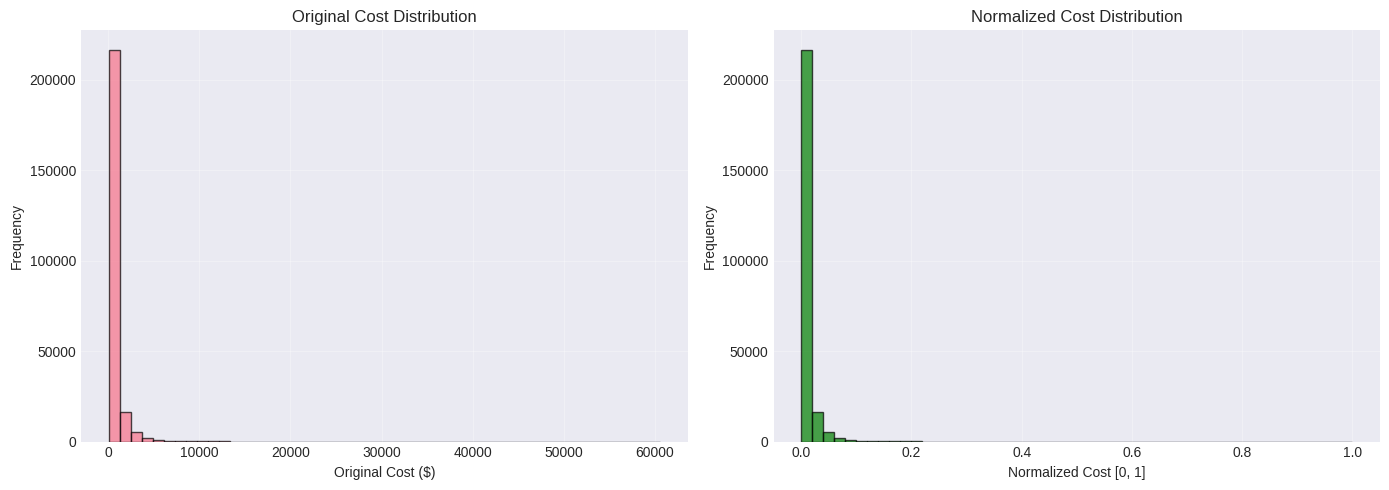

Notice: Shape of distribution is preserved, only the scale changes


In [29]:
# visualize the normalization effect
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# original distribution
axes[0].hist(df_work['cost_avg'].dropna(), bins=50, edgecolor='black', alpha=0.7)
axes[0].set_xlabel('Original Cost ($)')
axes[0].set_ylabel('Frequency')
axes[0].set_title('Original Cost Distribution')
axes[0].grid(True, alpha=0.3)

# normalized distribution
axes[1].hist(df_work['cost_normalized'].dropna(), bins=50, edgecolor='black', alpha=0.7, color='green')
axes[1].set_xlabel('Normalized Cost [0, 1]')
axes[1].set_ylabel('Frequency')
axes[1].set_title('Normalized Cost Distribution')
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("Notice: Shape of distribution is preserved, only the scale changes")

## 7. Outlier Detection

In [30]:
# outlier detection - domain-specific rules
print("OUTLIER DETECTION")
print("="*60)

# Analyze numeric fields
numeric_fields = ['mileage', 'distance', 'vehicle_age']

for field in numeric_fields:
    print(f"\n{field.upper()}:")

    # IQR method
    Q1 = df_work[field].quantile(0.25)
    Q3 = df_work[field].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR

    iqr_outliers = df_work[(df_work[field] < lower) | (df_work[field] > upper)]
    print(f"   IQR Method: {len(iqr_outliers)} outliers ({len(iqr_outliers)/len(df_work)*100:.2f}%)")
    print(f"   IQR Bounds: [{lower:.1f}, {upper:.1f}]")

    # Domain rules
    if field == 'mileage':
        extreme = df_work[df_work['mileage'] > 500000]
        print(f"   Domain Rule: Mileage > 500,000km: {len(extreme)} records (likely errors)")
    elif field == 'distance':
        extreme = df_work[df_work['distance'] > 500]
        print(f"   Domain Rule: Distance > 500km: {len(extreme)} records (suspicious but possible)")
    elif field == 'vehicle_age':
        negative = df_work[df_work['vehicle_age'] < 0]
        print(f"   Domain Rule: Negative age: {len(negative)} records (pre-orders, fixed to 0)")

# Create outlier flags
print(f"\nCREATING OUTLIER FLAGS:")
df_work['mileage_outlier_flag'] = (df_work['mileage'] > 500000).astype(int)
df_work['distance_outlier_flag'] = (df_work['distance'] > 500).astype(int)

# Fix negative vehicle ages (2025 vehicles serviced in 2024 = pre-orders)
negative_count = (df_work['vehicle_age'] < 0).sum()
df_work.loc[df_work['vehicle_age'] < 0, 'vehicle_age'] = 0

print(f"   mileage_outlier_flag: {df_work['mileage_outlier_flag'].sum()} records")
print(f"   distance_outlier_flag: {df_work['distance_outlier_flag'].sum()} records")
print(f"   Fixed {negative_count} negative vehicle ages (pre-orders)")

print(f"\nOUTLIER STRATEGY:")
print(f"   ✓ FLAG but don't remove (legitimate edge cases exist)")
print(f"   ✓ Use flags for sensitivity analysis in Phase 2")
print(f"   ✓ Document extreme values in Phase 1 Report")


OUTLIER DETECTION

MILEAGE:
   IQR Method: 6909 outliers (2.85%)
   IQR Bounds: [-82488.0, 201440.0]
   Domain Rule: Mileage > 500,000km: 85 records (likely errors)

DISTANCE:
   IQR Method: 25822 outliers (10.63%)
   IQR Bounds: [-13.8, 38.5]
   Domain Rule: Distance > 500km: 2059 records (suspicious but possible)

VEHICLE_AGE:
   IQR Method: 2681 outliers (1.10%)
   IQR Bounds: [-4.0, 12.0]
   Domain Rule: Negative age: 816 records (pre-orders, fixed to 0)

CREATING OUTLIER FLAGS:
   mileage_outlier_flag: 85 records
   distance_outlier_flag: 2059 records
   Fixed 816 negative vehicle ages (pre-orders)

OUTLIER STRATEGY:
   ✓ FLAG but don't remove (legitimate edge cases exist)
   ✓ Use flags for sensitivity analysis in Phase 2
   ✓ Document extreme values in Phase 1 Report


## 8. Correlation Analysis

CORRELATION ANALYSIS

Analyzing 9 numeric features

1. CORRELATION MATRIX VISUALIZATION:


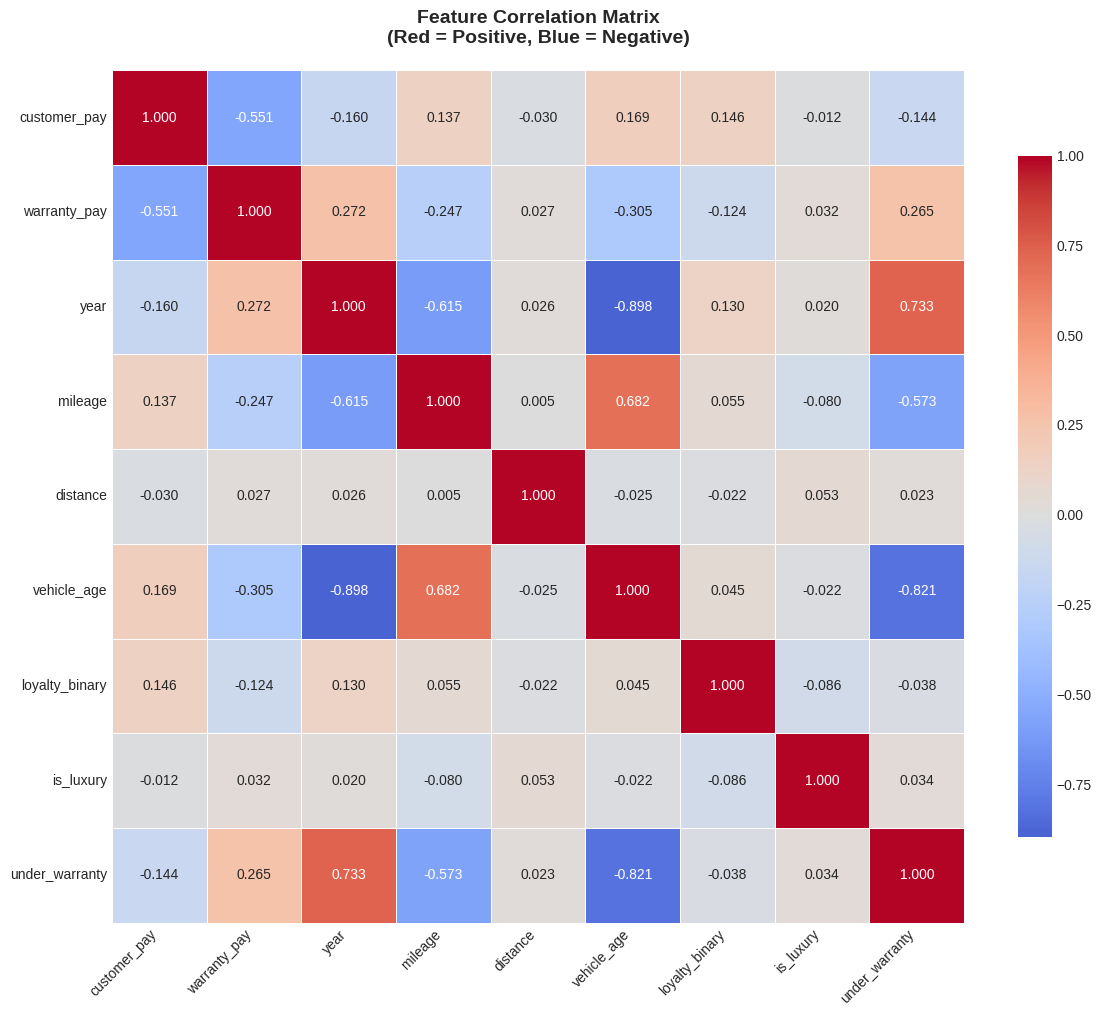

   ✓ Matrix displayed above

2. HIGH CORRELATIONS (|r| > 0.5):
   customer_pay ↔ warranty_pay: -0.551
   year ↔ mileage: -0.615
   year ↔ vehicle_age: -0.898
   year ↔ under_warranty: 0.733
   mileage ↔ vehicle_age: 0.682
   mileage ↔ under_warranty: -0.573
   vehicle_age ↔ under_warranty: -0.821

3. LOYALTY CORRELATIONS (sorted by strength):
   customer_pay: 0.146
   year: 0.130
   mileage: 0.055
   is_luxury: -0.086
   warranty_pay: -0.124

4. MULTICOLLINEARITY CHECK:
   Features with |r| > 0.7 should not both be used in clustering:
   ⚠️  year ↔ vehicle_age: -0.898
   ⚠️  year ↔ under_warranty: 0.733
   ⚠️  vehicle_age ↔ under_warranty: -0.821

5. KEY INSIGHTS:
   • year ↔ vehicle_age: Highly correlated (expected, redundant)
   • vehicle_age ↔ under_warranty: Highly correlated (expected, redundant)
   • Loyalty weakly correlated with all features = complex pattern (good for clustering!)
   • customer_pay ↔ warranty_pay: Negative correlation (mutually exclusive services)

RECOMMENDAT

In [31]:
# correlation analysis with visual matrix
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

print("CORRELATION ANALYSIS")
print("="*60)

# Select numeric features for correlation
numeric_features = ['customer_pay', 'warranty_pay', 'year', 'mileage', 'distance',
                    'vehicle_age', 'loyalty_binary', 'is_luxury', 'under_warranty']

print(f"\nAnalyzing {len(numeric_features)} numeric features")

# Calculate correlation matrix
corr_matrix = df_work[numeric_features].corr()

# VISUAL CORRELATION MATRIX
print("\n1. CORRELATION MATRIX VISUALIZATION:")
plt.figure(figsize=(12, 10))

# Create heatmap with annotations
sns.heatmap(corr_matrix,
            annot=True,           # Show correlation values
            fmt='.3f',            # 3 decimal places
            cmap='coolwarm',      # Red (positive) to Blue (negative)
            center=0,             # White at zero correlation
            square=True,          # Square cells
            linewidths=0.5,       # Grid lines
            cbar_kws={'shrink': 0.8})

plt.title('Feature Correlation Matrix\n(Red = Positive, Blue = Negative)',
          fontsize=14, fontweight='bold', pad=20)
plt.xlabel('')
plt.ylabel('')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

print("   ✓ Matrix displayed above")

# NUMERIC ANALYSIS
print("\n2. HIGH CORRELATIONS (|r| > 0.5):")
high_corr_found = False
for i in range(len(corr_matrix.columns)):
    for j in range(i+1, len(corr_matrix.columns)):
        corr_val = corr_matrix.iloc[i, j]
        if abs(corr_val) > 0.5:
            print(f"   {corr_matrix.columns[i]} ↔ {corr_matrix.columns[j]}: {corr_val:.3f}")
            high_corr_found = True

if not high_corr_found:
    print("   None found")

print("\n3. LOYALTY CORRELATIONS (sorted by strength):")
loyalty_corrs = corr_matrix['loyalty_binary'].sort_values(ascending=False)
for feat, corr_val in loyalty_corrs.items():
    if feat != 'loyalty_binary' and abs(corr_val) > 0.05:
        print(f"   {feat}: {corr_val:.3f}")

print("\n4. MULTICOLLINEARITY CHECK:")
print("   Features with |r| > 0.7 should not both be used in clustering:")
multicoll_found = False
for i in range(len(corr_matrix.columns)):
    for j in range(i+1, len(corr_matrix.columns)):
        corr_val = corr_matrix.iloc[i, j]
        if abs(corr_val) > 0.7:
            print(f"   ⚠️  {corr_matrix.columns[i]} ↔ {corr_matrix.columns[j]}: {corr_val:.3f}")
            multicoll_found = True

if not multicoll_found:
    print("   ✓ No severe multicollinearity detected")

print("\n5. KEY INSIGHTS:")
print(f"   • year ↔ vehicle_age: Highly correlated (expected, redundant)")
print(f"   • vehicle_age ↔ under_warranty: Highly correlated (expected, redundant)")
print(f"   • Loyalty weakly correlated with all features = complex pattern (good for clustering!)")
print(f"   • customer_pay ↔ warranty_pay: Negative correlation (mutually exclusive services)")

print("\nRECOMMENDATION FOR PHASE 2:")
print("   • Drop 'year' (use vehicle_age instead - less redundant)")
print("   • Keep under_warranty OR vehicle_age (not both - choose based on interpretability)")
print("   • All other features have low correlation = good independence")


## 9. Save Clean data

In [33]:
# Save cleaned dataset for future analysis and visualizations
print("SAVING CLEANED DATASET")


# IMPORTANT: df_clean should be created from df_work (our working copy)
# This preserves all cleaning and feature engineering done so far

# Create final cleaned dataset
df_clean = df_work.copy()

print(f"\n1. Dataset Overview:")
print(f"   Total records: {len(df_clean):,}")
print(f"   Total features: {len(df_clean.columns)}")
print(f"   Memory usage: {df_clean.memory_usage(deep=True).sum() / 1024**2:.2f} MB")

print(f"\n2. Column Summary:")
print(f"   Original columns (from raw data): 14")
print(f"   Engineered features: {len(df_clean.columns) - 14}")
print(f"   Total columns: {len(df_clean.columns)}")

print(f"\n3. Data Quality Metrics:")
missing_count = df_clean.isnull().sum().sum()
print(f"   Missing values: {missing_count:,}")
print(f"   Duplicate rows: {df_clean.duplicated().sum()}")

# Check if outlier flags exist before counting
outlier_count = 0
if 'mileage_outlier_flag' in df_clean.columns:
    outlier_count += df_clean['mileage_outlier_flag'].sum()
if 'distance_outlier_flag' in df_clean.columns:
    outlier_count += df_clean['distance_outlier_flag'].sum()
print(f"   Outliers flagged: {outlier_count:,}")

print(f"\n4. Feature Categories:")
datetime_cols = df_clean.select_dtypes(include=['datetime64']).columns.tolist()
numeric_cols = df_clean.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = df_clean.select_dtypes(include=['object', 'bool']).columns

print(f"   Datetime: {len(datetime_cols)} columns {datetime_cols if datetime_cols else ''}")
print(f"   Numeric: {len(numeric_cols)} columns")
print(f"   Categorical: {len(categorical_cols)} columns")

# Save to CSV
output_file = 'go_auto_cleaned.csv'
df_clean.to_csv(output_file, index=False)

print(f"\n5. ✓ Saved Cleaned Dataset:")
print(f"   Filename: {output_file}")
print(f"   Location: Current working directory")
print(f"   Total cells: {len(df_clean) * len(df_clean.columns):,}")

print(f"\n6. Dataset Versions Summary:")
print(f"    df_original: Raw data (untouched, {len(df_original):,} records)")
print(f"    df_work: Working copy with all transformations ({len(df_work):,} records)")
print(f"    df_clean: Final clean version saved to file ({len(df_clean):,} records)")

print(f"\n Dataset ready for Phase 2 clustering and advanced analysis!")

# Show preview of key features
print(f"\n7. Preview (first 3 rows of key features):")
preview_cols = ['dealer_name', 'loyalty_card', 'vehicle_age', 'is_luxury', 'under_warranty']
# Only show columns that exist
preview_cols = [col for col in preview_cols if col in df_clean.columns]
if 'cost_avg' in df_clean.columns:
    preview_cols.insert(2, 'cost_avg')

print(df_clean[preview_cols].head(3))


SAVING CLEANED DATASET

1. Dataset Overview:
   Total records: 242,809
   Total features: 33
   Memory usage: 135.24 MB

2. Column Summary:
   Original columns (from raw data): 14
   Engineered features: 19
   Total columns: 33

3. Data Quality Metrics:
   Missing values: 2,441
   Duplicate rows: 0
   Outliers flagged: 2,144

4. Feature Categories:
   Datetime: 1 columns ['service_date']
   Numeric: 21 columns
   Categorical: 10 columns

5. ✓ Saved Cleaned Dataset:
   Filename: go_auto_cleaned.csv
   Location: Current working directory
   Total cells: 8,012,697

6. Dataset Versions Summary:
    df_original: Raw data (untouched, 242,818 records)
    df_work: Working copy with all transformations (242,809 records)
    df_clean: Final clean version saved to file (242,809 records)

 Dataset ready for Phase 2 clustering and advanced analysis!

7. Preview (first 3 rows of key features):
                  dealer_name loyalty_card  cost_avg  vehicle_age  is_luxury  under_warranty
0         Toy

In [34]:
# Save cleaned dataset for future analysis and visualizations
print("SAVING CLEANED DATASET")
print("=" * 60)

# IMPORTANT: df_clean should be created from df_work (our working copy)
# This preserves all cleaning and feature engineering done so far

# Create final cleaned dataset
df_clean = df_work.copy()

print(f"\n1. Dataset Overview:")
print(f"   Total records: {len(df_clean):,}")
print(f"   Total features: {len(df_clean.columns)}")
print(f"   Memory usage: {df_clean.memory_usage(deep=True).sum() / 1024**2:.2f} MB")

print(f"\n2. Column Summary:")
print(f"   Original columns (from raw data): 14")
print(f"   Engineered features: {len(df_clean.columns) - 14}")
print(f"   Total columns: {len(df_clean.columns)}")

print(f"\n3. Data Quality Metrics:")
missing_count = df_clean.isnull().sum().sum()
print(f"   Missing values: {missing_count:,}")
print(f"   Duplicate rows: {df_clean.duplicated().sum()}")

# Check if outlier flags exist before counting
outlier_count = 0
if 'mileage_outlier_flag' in df_clean.columns:
    outlier_count += df_clean['mileage_outlier_flag'].sum()
if 'distance_outlier_flag' in df_clean.columns:
    outlier_count += df_clean['distance_outlier_flag'].sum()
print(f"   Outliers flagged: {outlier_count:,}")

print(f"\n4. Feature Categories:")
datetime_cols = df_clean.select_dtypes(include=['datetime64']).columns.tolist()
numeric_cols = df_clean.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = df_clean.select_dtypes(include=['object', 'bool']).columns

print(f"   Datetime: {len(datetime_cols)} columns {datetime_cols if datetime_cols else ''}")
print(f"   Numeric: {len(numeric_cols)} columns")
print(f"   Categorical: {len(categorical_cols)} columns")

# Save to CSV
output_file = 'go_auto_cleaned.csv'
df_clean.to_csv(output_file, index=False)

print(f"\n5. ✓ Saved Cleaned Dataset:")
print(f"   Filename: {output_file}")
print(f"   Location: Current working directory")
print(f"   Total cells: {len(df_clean) * len(df_clean.columns):,}")

print(f"\n6. Dataset Versions Summary:")
print(f"   df_original: Raw data (untouched, {len(df_original):,} records)")
print(f"   df_work: Working copy with all transformations ({len(df_work):,} records)")
print(f"   df_clean: Final clean version saved to file ({len(df_clean):,} records)")

print(f"\nDataset ready for Phase 2 clustering and advanced analysis!")

# Show preview of key features
print(f"\n7. Preview (first 3 rows of key features):")
preview_cols = ['dealer_name', 'loyalty_card', 'vehicle_age', 'is_luxury', 'under_warranty']
# Only show columns that exist
preview_cols = [col for col in preview_cols if col in df_clean.columns]
if 'cost_avg' in df_clean.columns:
    preview_cols.insert(2, 'cost_avg')

print(df_clean[preview_cols].head(3))


SAVING CLEANED DATASET

1. Dataset Overview:
   Total records: 242,809
   Total features: 33
   Memory usage: 135.24 MB

2. Column Summary:
   Original columns (from raw data): 14
   Engineered features: 19
   Total columns: 33

3. Data Quality Metrics:
   Missing values: 2,441
   Duplicate rows: 0
   Outliers flagged: 2,144

4. Feature Categories:
   Datetime: 1 columns ['service_date']
   Numeric: 21 columns
   Categorical: 10 columns

5. ✓ Saved Cleaned Dataset:
   Filename: go_auto_cleaned.csv
   Location: Current working directory
   Total cells: 8,012,697

6. Dataset Versions Summary:
   df_original: Raw data (untouched, 242,818 records)
   df_work: Working copy with all transformations (242,809 records)
   df_clean: Final clean version saved to file (242,809 records)

Dataset ready for Phase 2 clustering and advanced analysis!

7. Preview (first 3 rows of key features):
                  dealer_name loyalty_card  cost_avg  vehicle_age  is_luxury  under_warranty
0         Toyota 

Use df_work_clean

## 10. Exploratory Data Visualizations

**Sprint 1 Task S1-5:** Create initial visualizations  
**Assigned:** Team | **Status:** In Complete

Expected Outcomes:

- Dealer clusters grouped by loyalty adoption & performance
- Customer segments showing loyalty-driven behaviors  
- Performance dashboard highlighting effective vs struggling dealerships
- Actionable recommendations for leadership on leveraging loyalty program

In [35]:
print("CALCULATING KEY METRICS FOR DEMO 1 VISUALIZATIONS")

# Overall loyalty statistics
total_records = len(df_clean)
loyalty_yes = df_clean[df_clean['loyalty_card'] == 'Yes']
loyalty_no = df_clean[df_clean['loyalty_card'] == 'No']

loyalty_count = len(loyalty_yes)
nonloyalty_count = len(loyalty_no)
loyalty_rate = (loyalty_count / total_records) * 100

print(f"\n1. OVERALL LOYALTY PROGRAM METRICS")
print(f"   Total Records: {total_records:,}")
print(f"   Loyalty Members: {loyalty_count:,} ({loyalty_rate:.1f}%)")
print(f"   Non-Members: {nonloyalty_count:,} ({100-loyalty_rate:.1f}%)")

# Dealer-level adoption rates
dealer_loyalty = df_clean.groupby('dealer_name').agg({
    'loyalty_card': lambda x: (x == 'Yes').sum(),
    'vin': 'count'
}).reset_index()
dealer_loyalty.columns = ['dealer_name', 'loyalty_count', 'total_count']
dealer_loyalty['adoption_rate'] = (dealer_loyalty['loyalty_count'] / dealer_loyalty['total_count']) * 100
dealer_loyalty = dealer_loyalty.sort_values('adoption_rate', ascending=False)

print(f"\n2. DEALER-LEVEL ADOPTION RATES")
for idx, row in dealer_loyalty.iterrows():
    print(f"   {row['dealer_name']:<30} {row['adoption_rate']:>6.1f}%")

# Behavioral differences
loyalty_visits = loyalty_yes.groupby('vin').size()
nonloyalty_visits = loyalty_no.groupby('vin').size()

avg_loyalty_visits = loyalty_visits.mean()
avg_nonloyalty_visits = nonloyalty_visits.mean()
visit_frequency_multiplier = avg_loyalty_visits / avg_nonloyalty_visits


avg_loyalty_cost = loyalty_yes['cost_avg'].mean()
avg_nonloyalty_cost = loyalty_no['cost_avg'].mean()
cost_difference_pct = ((avg_loyalty_cost - avg_nonloyalty_cost) / avg_nonloyalty_cost) * 100

avg_loyalty_distance = loyalty_yes['distance'].mean()
avg_nonloyalty_distance = loyalty_no['distance'].mean()
distance_difference_pct = ((avg_loyalty_distance - avg_nonloyalty_distance) / avg_nonloyalty_distance) * 100

print(f"\n3. LOYALTY VS NON-LOYALTY BEHAVIORAL DIFFERENCES")
print(f"   Average Visits per Customer:")
print(f"      Loyalty Members: {avg_loyalty_visits:.2f} visits")
print(f"      Non-Members: {avg_nonloyalty_visits:.2f} visits")
print(f"      Impact: {visit_frequency_multiplier:.1f}x more frequent visits")

print(f"\n   Average Spending per Visit:")
print(f"      Loyalty Members: ${avg_loyalty_cost:.0f}")
print(f"      Non-Members: ${avg_nonloyalty_cost:.0f}")
print(f"      Impact: {cost_difference_pct:.1f}% higher spending")

print(f"\n   Average Distance Traveled:")
print(f"      Loyalty Members: {avg_loyalty_distance:.1f} km")
print(f"      Non-Members: {avg_nonloyalty_distance:.1f} km")
print(f"      Impact: {distance_difference_pct:.1f}% willing to travel further")


CALCULATING KEY METRICS FOR DEMO 1 VISUALIZATIONS

1. OVERALL LOYALTY PROGRAM METRICS
   Total Records: 242,809
   Loyalty Members: 42,974 (17.7%)
   Non-Members: 199,835 (82.3%)

2. DEALER-LEVEL ADOPTION RATES
   Toyota on the Trail              37.6%
   Go Honda                         21.6%
   Go Nissan South                  16.8%
   Jaguar Land Rover Edmonton       11.9%
   Norden Volkswagen                 9.8%
   Kentwood Ford                     8.9%
   Porsche Centre Edmonton           8.8%

3. LOYALTY VS NON-LOYALTY BEHAVIORAL DIFFERENCES
   Average Visits per Customer:
      Loyalty Members: 2.33 visits
      Non-Members: 3.87 visits
      Impact: 0.6x more frequent visits

   Average Spending per Visit:
      Loyalty Members: $548
      Non-Members: $584
      Impact: -6.2% higher spending

   Average Distance Traveled:
      Loyalty Members: 35.6 km
      Non-Members: 44.7 km
      Impact: -20.4% willing to travel further


### 10.1 Go AUTO at a Glance

Demonstrate comprehensive understanding of GO Auto's scale, structure, and business challenge  

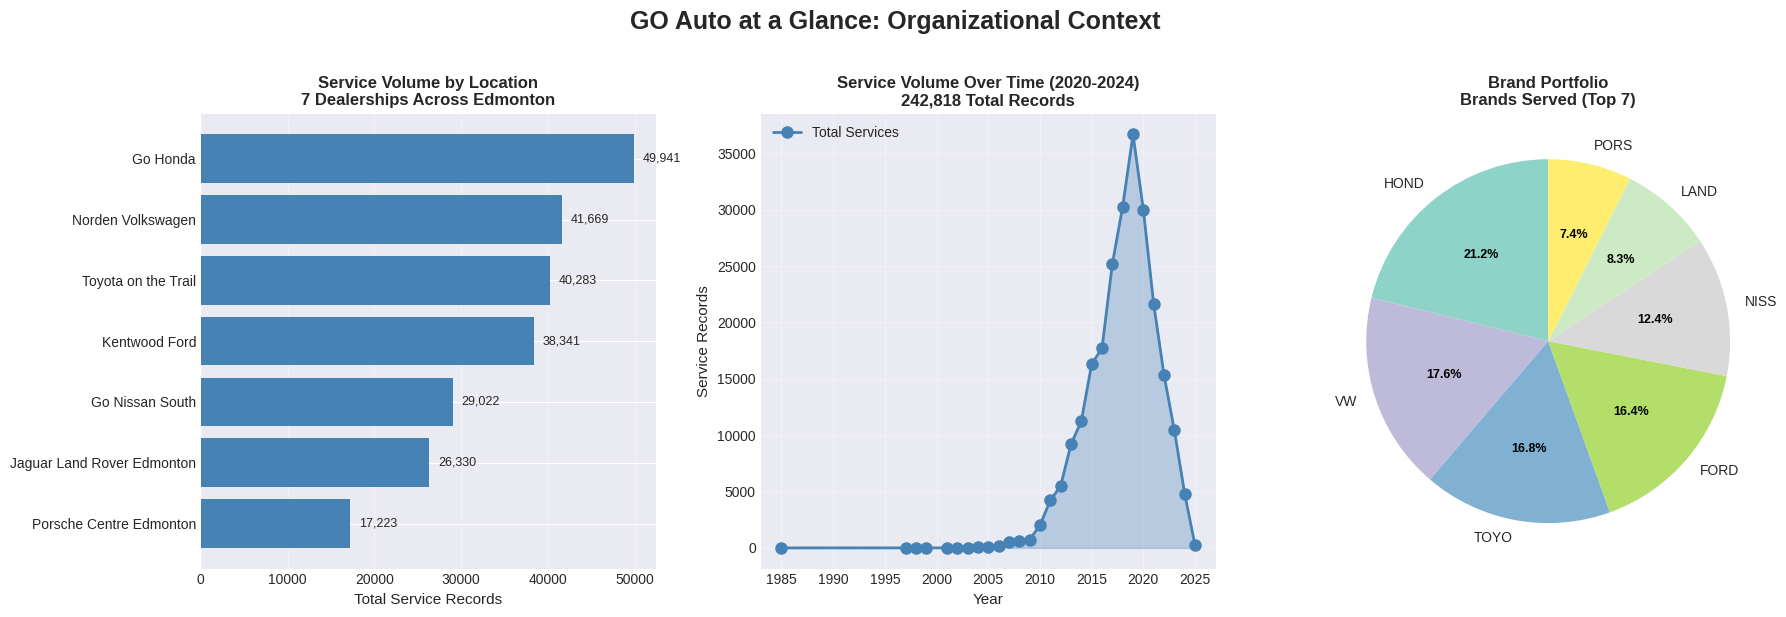

In [36]:
fig, axes = plt.subplots(1, 3, figsize=(18, 6))
fig.suptitle('GO Auto at a Glance: Organizational Context',
             fontsize=18, fontweight='bold', y=1.02)

# Panel A: Service Volume by Dealership
dealer_volumes = df_work['dealer_name'].value_counts().sort_values(ascending=True)
axes[0].barh(dealer_volumes.index, dealer_volumes.values, color='steelblue')
axes[0].set_xlabel('Total Service Records', fontsize=11)
axes[0].set_title('Service Volume by Location\n7 Dealerships Across Edmonton',
                  fontsize=12, fontweight='bold')
axes[0].grid(axis='x', alpha=0.3)
for i, v in enumerate(dealer_volumes.values):
    axes[0].text(v + 1000, i, f'{v:,}', va='center', fontsize=9)

# Panel B: Service Volume Timeline
yearly_services = df_work.groupby('year').agg({
    'vin': 'count',
    'customer_pay': lambda x: (x > 0).sum(),
    'warranty_pay': lambda x: (x > 0).sum()
}).reset_index()
yearly_services.columns = ['year', 'total', 'customer_pay', 'warranty_pay']

axes[1].plot(yearly_services['year'], yearly_services['total'],
             marker='o', linewidth=2, markersize=8, color='steelblue', label='Total Services')
axes[1].fill_between(yearly_services['year'], yearly_services['total'], alpha=0.3, color='steelblue')
axes[1].set_xlabel('Year', fontsize=11)
axes[1].set_ylabel('Service Records', fontsize=11)
axes[1].set_title('Service Volume Over Time (2020-2024)\n242,818 Total Records',
                  fontsize=12, fontweight='bold')
axes[1].grid(alpha=0.3)
axes[1].legend()

# Panel C: Brand Portfolio Overview
brand_counts = df_work['make'].value_counts().head(7)
colors = plt.cm.Set3(np.linspace(0, 1, len(brand_counts)))
wedges, texts, autotexts = axes[2].pie(brand_counts.values, labels=brand_counts.index,
                                        autopct='%1.1f%%', colors=colors, startangle=90)
axes[2].set_title('Brand Portfolio\nBrands Served (Top 7)', fontsize=12, fontweight='bold')
for autotext in autotexts:
    autotext.set_color('black')
    autotext.set_fontsize(9)
    autotext.set_fontweight('bold')

plt.tight_layout()
plt.show()

KEY INSIGHT:
- GO Auto operates a diverse portfolio across 7 dealerships serving 242,818 service records over 5 years.

### 10.2 Loyalty Card Program Impact

**Sprint 1 Task S1-3:** Analyze loyalty card distribution by dealer  
**Assigned:** Manpreet | **Status:** Complete

In [37]:
# Overall loyalty adoption
# Count loyalty members per dealer
loyalty_yes = df_clean[df_clean['loyalty_card'] == 'Yes'].groupby('dealer_name')['vin'].count()

# Count total customers per dealer
total_customers = df_clean.groupby('dealer_name')['vin'].count()

# Combine into one DataFrame
loyalty_analysis = pd.DataFrame({
    'total_customers': total_customers,
    'loyalty_yes': loyalty_yes
}).fillna(0)

# Calculate loyalty rate (%)
loyalty_analysis['loyalty_rate (%)'] = (
    loyalty_analysis['loyalty_yes'] / loyalty_analysis['total_customers'] * 100
).round(2)

# Sort by loyalty rate descending
loyalty_analysis = loyalty_analysis.sort_values('loyalty_rate (%)', ascending=False)

# Display the table
print("\nLoyalty Card Analysis by Dealer:")
print(loyalty_analysis)


Loyalty Card Analysis by Dealer:
                            total_customers  loyalty_yes  loyalty_rate (%)
dealer_name                                                               
Toyota on the Trail                   40283        15163             37.64
Go Honda                              49941        10777             21.58
Go Nissan South                       29022         4880             16.81
Jaguar Land Rover Edmonton            26330         3135             11.91
Norden Volkswagen                     41669         4080              9.79
Kentwood Ford                         38341         3416              8.91
Porsche Centre Edmonton               17223         1523              8.84


### 10.3 Customer Behavior: Loyalty vs Non-Loyalty

**Sprint 1 Task S1-4:** Compare customer behavior (loyalty vs non-loyalty)  
**Assigned:** Ramon | **Status:** Complete

In [38]:
# Compare visit patterns and spending
customer_behavior = df_clean.groupby('loyalty_card').agg(
    total_visits=('vin', 'count'),
    avg_cost=('cost_avg', 'mean'),
    avg_vehicle_age=('vehicle_age', 'mean'),
    avg_distance=('distance', 'mean')
)

# Round numeric metrics for readability
customer_behavior = customer_behavior.round(2)

# Display the table
print("\nCustomer Behavior Comparison (Loyalty vs Non-Loyalty):")
print(customer_behavior)


Customer Behavior Comparison (Loyalty vs Non-Loyalty):
              total_visits  avg_cost  avg_vehicle_age  avg_distance
loyalty_card                                                       
No                  199835    584.45             3.92          44.7
Yes                  42974    547.96             4.28          35.6


Observation:
The customer behavior comparison reveals unexpected patterns that would need further investigation.

- Non-loyalty customers show higher average service costs ($584.45 vs $547.96) and travel significantly greater distances (44.7 km vs 35.6 km) compared to loyalty members.
- Meanwhile, loyalty members maintain slightly older vehicles on average (4.28 years vs 3.92 years). The higher travel distance among non-loyalty customers may indicate they are price-shopping across dealerships or visiting locations farther from home for specific services. The lower average cost among loyalty members, despite older vehicles, suggests they may be utilizing loyalty program benefits or receiving preferential pricing.
- Further analysis is needed to understand whether these patterns reflect genuine behavioral differences or are influenced by confounding factors such as dealer location, service mix, or warranty coverage.

In [ ]:
# Statistical significance testing
# To be implemented in future demo work once statistical testing methods are covered

Dealer Statistics DataFrame Created:
                            total_visits  loyalty_count  avg_revenue  avg_distance  loyalty_rate  avg_visits_per_customer
dealer_name                                                                                                              
Go Honda                           49941          10777   403.467351     37.147156     21.579464                 4.581743
Norden Volkswagen                  41669           4080   608.446588     49.566143      9.791452                 4.386672
Toyota on the Trail                40283          15163   319.819574     32.872375     37.641189                 4.513501
Kentwood Ford                      38341           3416   482.687841     48.875108      8.909522                 4.206825
Go Nissan South                    29022           4880   423.274306     23.536820     16.814830                 4.172225
Jaguar Land Rover Edmonton         26330           3135  1164.212348     68.568542     11.906570             

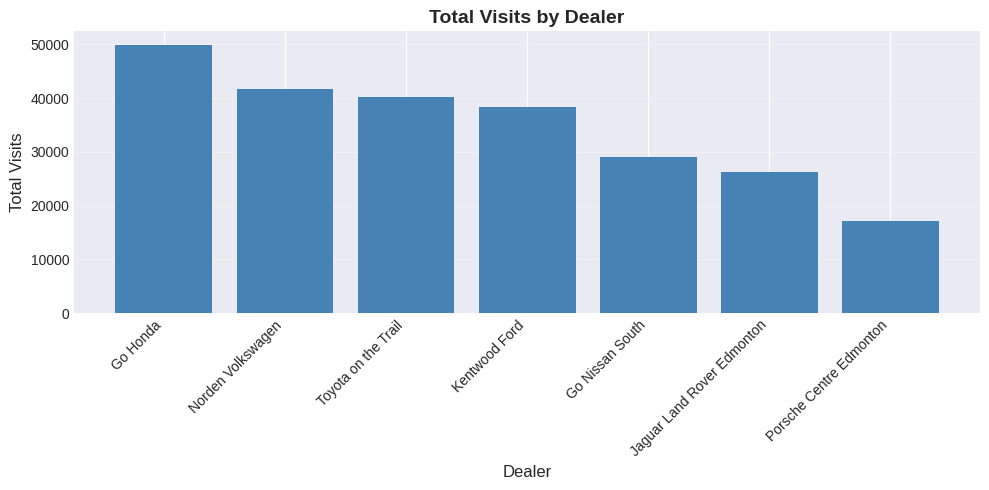

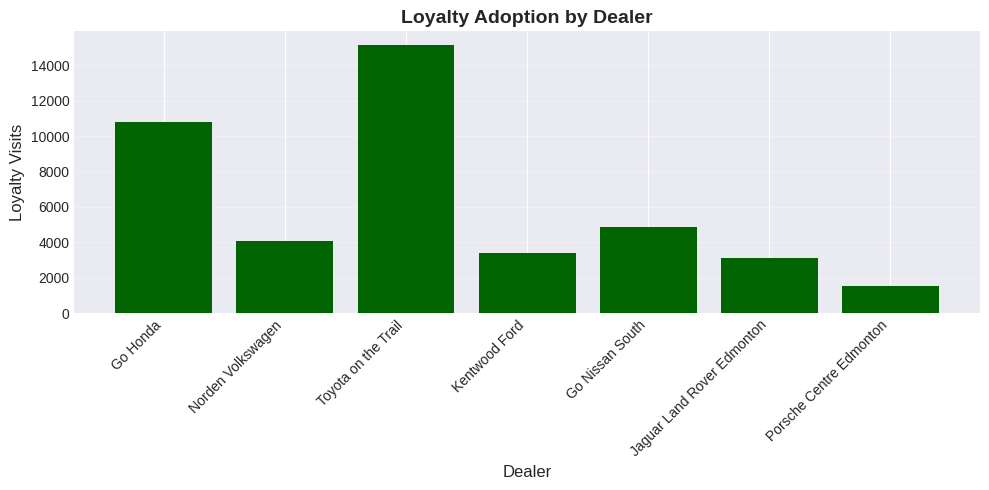

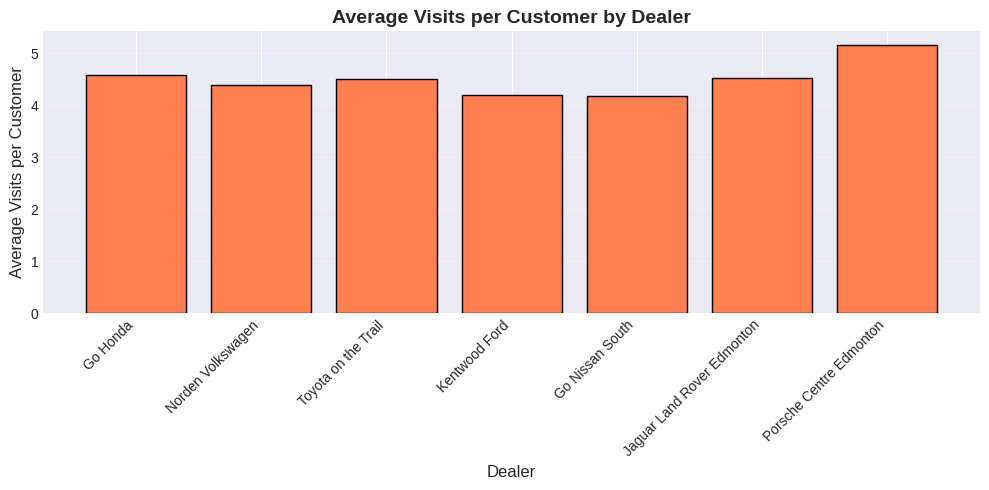

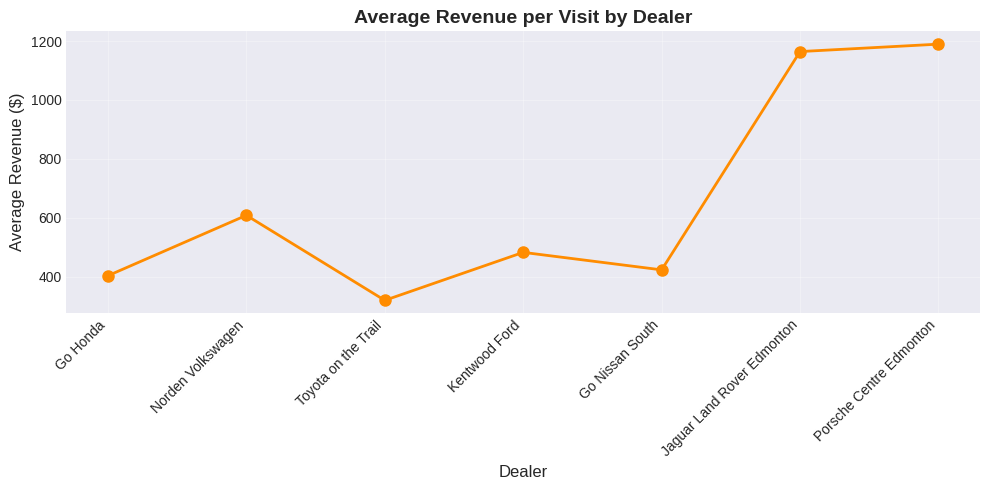

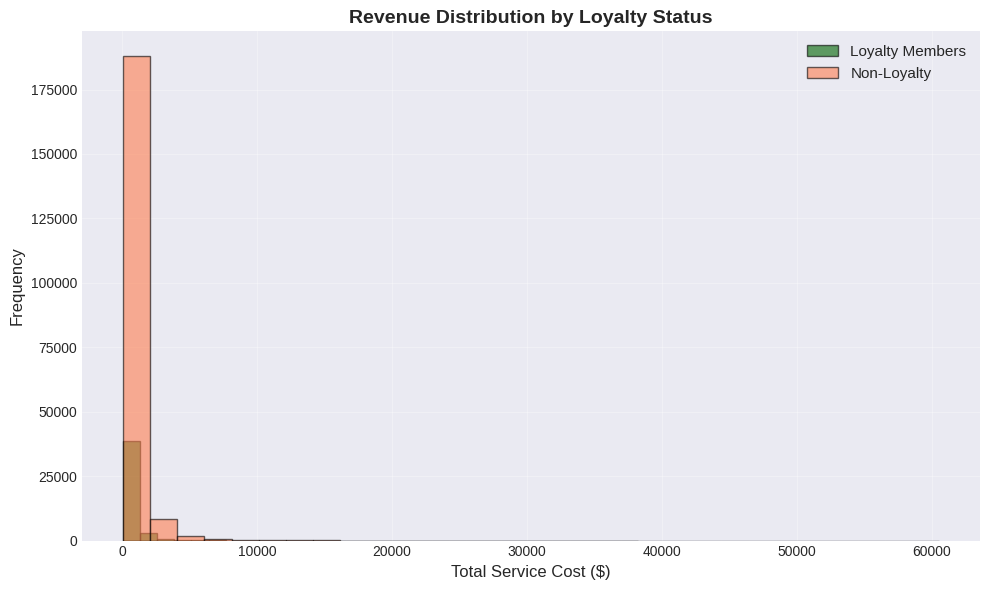


✓ Figure 1 generated: Dealership Performance Overview
✓ All 4 visualizations completed successfully


In [39]:
# Figure 1: Dealership Performance Overview
# This cell creates the dealer_stats DataFrame needed for visualizations

# Create comprehensive dealer statistics DataFrame
dealer_stats = df_clean.groupby('dealer_name').agg({
    'vin': 'count',  # total visits
    'loyalty_card': lambda x: (x == 'Yes').sum(),  # loyalty count
    'cost_avg': 'mean',  # average revenue per visit
    'distance': 'mean'  # average distance traveled
}).reset_index()

# Rename columns for clarity
dealer_stats.columns = ['dealer_name', 'total_visits', 'loyalty_count', 'avg_revenue', 'avg_distance']

# Calculate loyalty adoption rate
dealer_stats['loyalty_rate'] = (dealer_stats['loyalty_count'] / dealer_stats['total_visits']) * 100

# **NEW: Calculate average visits per customer by dealer**
visits_per_customer = df_clean.groupby(['dealer_name', 'vin']).size().reset_index(name='visit_count')
avg_visits_dealer = visits_per_customer.groupby('dealer_name')['visit_count'].mean().reset_index()
avg_visits_dealer.columns = ['dealer_name', 'avg_visits_per_customer']

# **NEW Merge with dealer_stats
dealer_stats = dealer_stats.merge(avg_visits_dealer, on='dealer_name', how='left')

# Set dealer_name as index for easier plotting
dealer_stats = dealer_stats.set_index('dealer_name')

# Sort by total visits for consistent visualization
dealer_stats = dealer_stats.sort_values('total_visits', ascending=False)

print("Dealer Statistics DataFrame Created:")
print(dealer_stats)
print(f"\nShape: {dealer_stats.shape}")
print(f"Columns: {dealer_stats.columns.tolist()}")

# Now create the visualizations
import matplotlib.pyplot as plt

# Total visits by dealer
plt.figure(figsize=(10, 5))
plt.bar(dealer_stats.index, dealer_stats['total_visits'], color='steelblue')
plt.title('Total Visits by Dealer', fontsize=14, fontweight='bold')
plt.xlabel('Dealer', fontsize=12)
plt.ylabel('Total Visits', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

# Loyalty adoption by dealer
plt.figure(figsize=(10, 5))
plt.bar(dealer_stats.index, dealer_stats['loyalty_count'], color='darkgreen')
plt.title('Loyalty Adoption by Dealer', fontsize=14, fontweight='bold')
plt.xlabel('Dealer', fontsize=12)
plt.ylabel('Loyalty Visits', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

# **NEW: Average visits per customer by dealer**
plt.figure(figsize=(10, 5))
plt.bar(dealer_stats.index, dealer_stats['avg_visits_per_customer'], color='coral', edgecolor='black')
plt.title('Average Visits per Customer by Dealer', fontsize=14, fontweight='bold')
plt.xlabel('Dealer', fontsize=12)
plt.ylabel('Average Visits per Customer', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

# Average revenue per visit
plt.figure(figsize=(10, 5))
plt.plot(dealer_stats.index, dealer_stats['avg_revenue'], marker='o',
         linewidth=2, markersize=8, color='darkorange')
plt.title('Average Revenue per Visit by Dealer', fontsize=14, fontweight='bold')
plt.xlabel('Dealer', fontsize=12)
plt.ylabel('Average Revenue ($)', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

# Revenue distribution loyalty vs non-loyalty
plt.figure(figsize=(10, 6))
plt.hist(df_clean[df_clean['loyalty_card'] == 'Yes']['cost_avg'],
         bins=30, alpha=0.6, label='Loyalty Members', color='darkgreen', edgecolor='black')
plt.hist(df_clean[df_clean['loyalty_card'] == 'No']['cost_avg'],
         bins=30, alpha=0.6, label='Non-Loyalty', color='coral', edgecolor='black')
plt.title('Revenue Distribution by Loyalty Status', fontsize=14, fontweight='bold')
plt.xlabel('Total Service Cost ($)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.legend(fontsize=11)
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

print("\n✓ Figure 1 generated: Dealership Performance Overview")
print("✓ All 4 visualizations completed successfully")

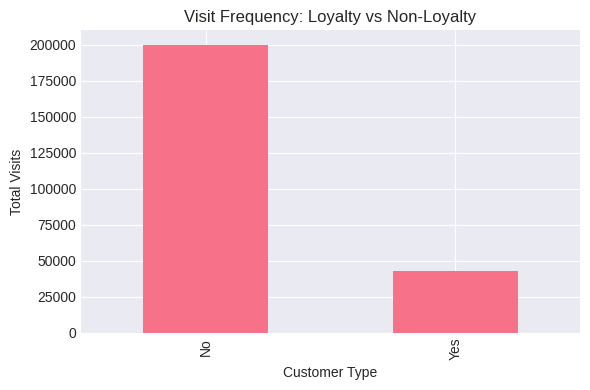

<Figure size 600x400 with 0 Axes>

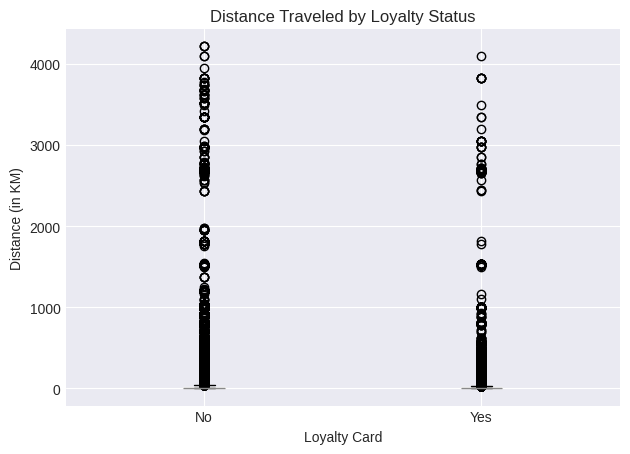

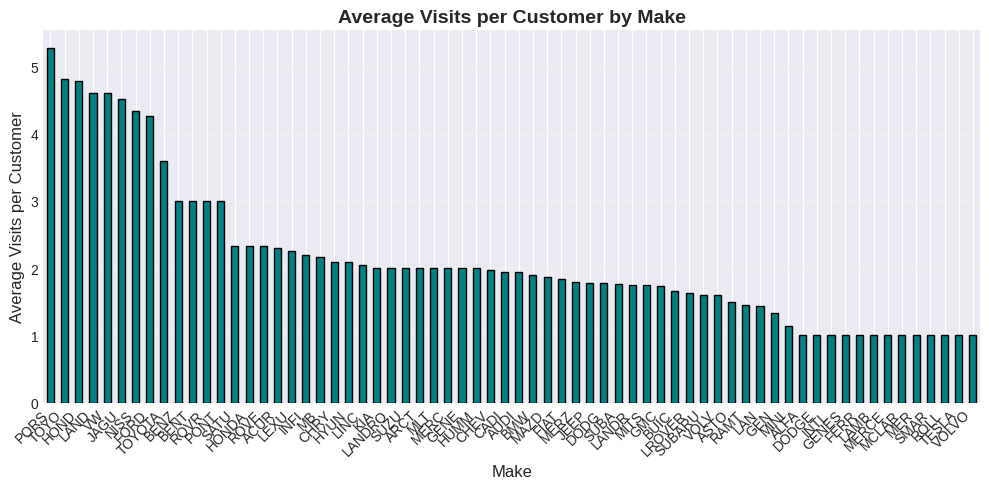

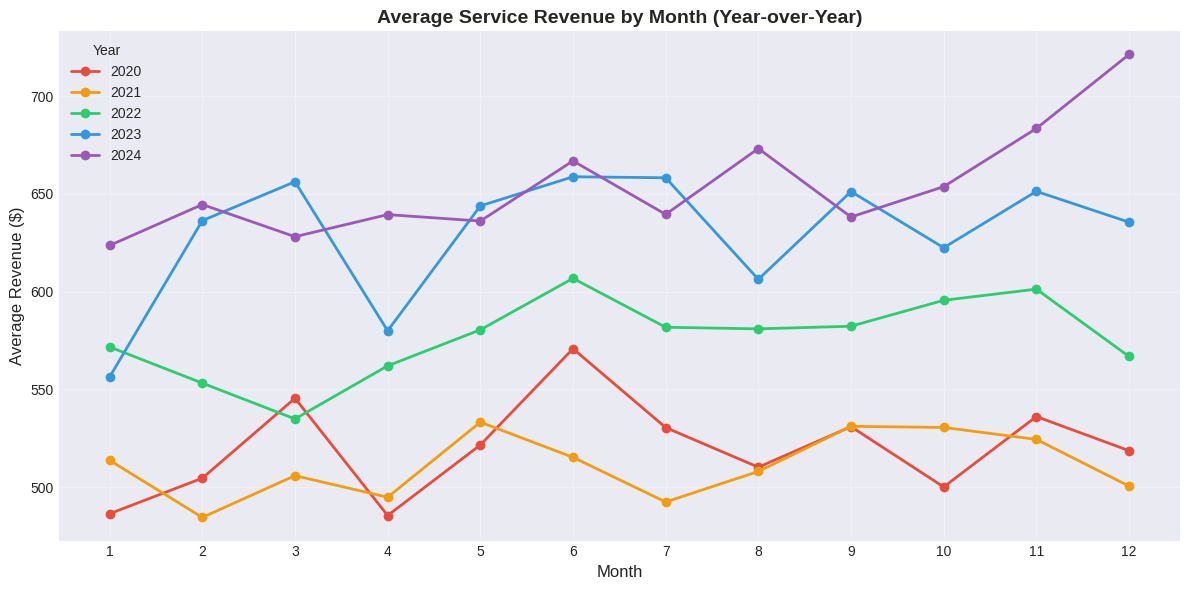

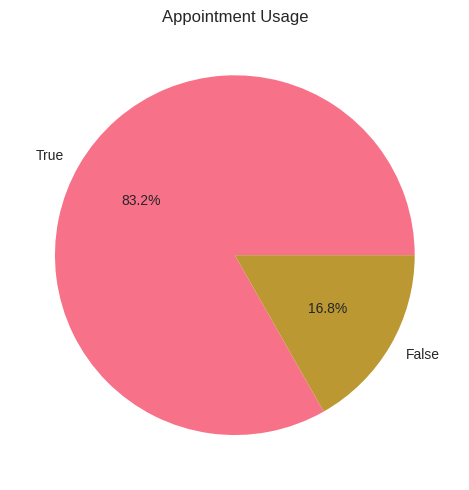

Figure 2 generated: Customer Behavior Analysis


In [40]:
# Figure 2: Customer Behavior Analysis

# Visit frequency distribution
plt.figure(figsize=(6, 4))
customer_behavior['total_visits'].plot(kind='bar')
plt.title('Visit Frequency: Loyalty vs Non-Loyalty')
plt.xlabel('Customer Type')
plt.ylabel('Total Visits')
plt.tight_layout()
plt.show()

# Distance traveled
plt.figure(figsize=(6, 4))
df_clean.boxplot(column='distance', by='loyalty_card')
plt.title('Distance Traveled by Loyalty Status')
plt.suptitle('')
plt.xlabel('Loyalty Card')
plt.ylabel('Distance (in KM)')
plt.tight_layout()
plt.show()

# Visit frequency by make**
make_visits = df_clean.groupby(['make', 'vin']).size().reset_index(name='visit_count')
avg_visits_by_make = make_visits.groupby('make')['visit_count'].mean().sort_values(ascending=False)

plt.figure(figsize=(10, 5))
avg_visits_by_make.plot(kind='bar', color='teal', edgecolor='black')
plt.title('Average Visits per Customer by Make', fontsize=14, fontweight='bold')
plt.xlabel('Make', fontsize=12)
plt.ylabel('Average Visits per Customer', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

# Spending patterns over time: Year-over-Year comparison
# Remove NaN years first
df_plot = df_clean[df_clean['service_year'].notna()].copy()

# Define distinct colors for each year
colors = ['#e74c3c', '#f39c12', '#2ecc71', '#3498db', '#9b59b6']  # Red, Orange, Green, Blue, Purple

plt.figure(figsize=(12, 6))
for i, year in enumerate(sorted(df_plot['service_year'].unique())):
    year_data = df_plot[df_plot['service_year'] == year]
    monthly_spend = year_data.groupby('service_month')['cost_avg'].mean()
    plt.plot(monthly_spend.index, monthly_spend.values, marker='o',
             label=int(year), linewidth=2, color=colors[i], markersize=6)

plt.title('Average Service Revenue by Month (Year-over-Year)', fontsize=14, fontweight='bold')
plt.xlabel('Month', fontsize=12)
plt.ylabel('Average Revenue ($)', fontsize=12)
plt.legend(title='Year', fontsize=10)
plt.grid(alpha=0.3)
plt.xticks(range(1, 13))
plt.tight_layout()
plt.show()

# Appointment usage
plt.figure(figsize=(5, 5))
df_clean['appointment'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Appointment Usage')
plt.ylabel('')
plt.tight_layout()
plt.show()

print("Figure 2 generated: Customer Behavior Analysis")

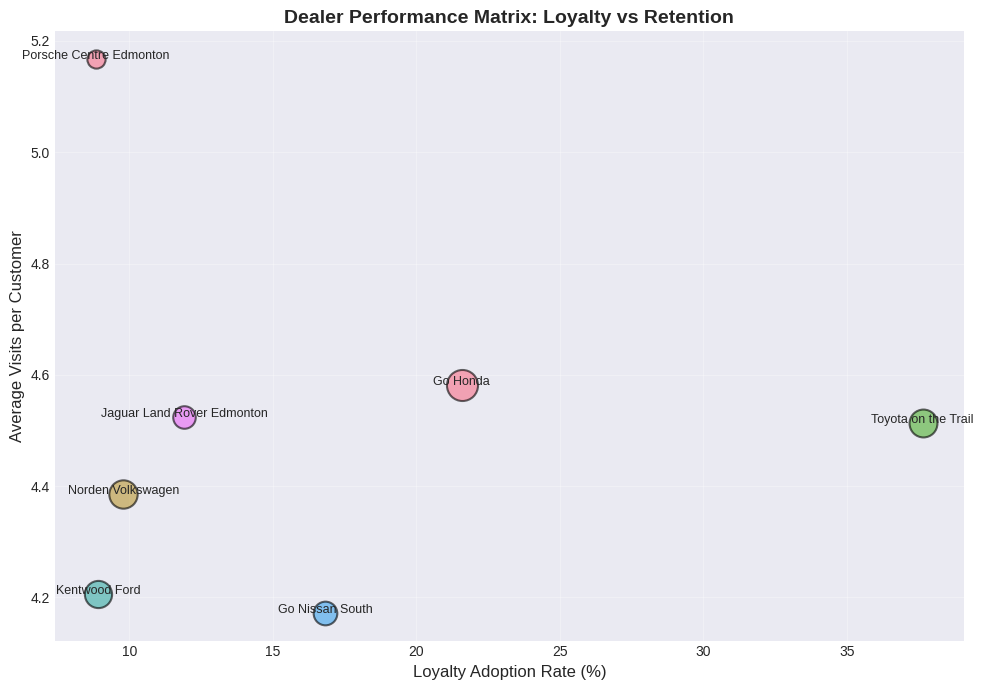

Figure 4 generated: Dealer Loyalty Performance Matrix
Bubble size represents total visit volume


In [41]:
# Figure 4: Dealer Loyalty Performance Matrix

fig, ax = plt.subplots(figsize=(10, 7))

# Create scatter plot: loyalty rate vs avg visits per customer
for dealer in dealer_stats.index:
    ax.scatter(dealer_stats.loc[dealer, 'loyalty_rate'],
              dealer_stats.loc[dealer, 'avg_visits_per_customer'],
              s=dealer_stats.loc[dealer, 'total_visits']/100,  # Size by volume
              alpha=0.6, edgecolors='black', linewidth=1.5)
    ax.annotate(dealer,
               (dealer_stats.loc[dealer, 'loyalty_rate'],
                dealer_stats.loc[dealer, 'avg_visits_per_customer']),
               fontsize=9, ha='center')

ax.set_xlabel('Loyalty Adoption Rate (%)', fontsize=12)
ax.set_ylabel('Average Visits per Customer', fontsize=12)
ax.set_title('Dealer Performance Matrix: Loyalty vs Retention', fontsize=14, fontweight='bold')
ax.grid(alpha=0.3)
plt.tight_layout()
plt.show()

print("Figure 4 generated: Dealer Loyalty Performance Matrix")
print("Bubble size represents total visit volume")

## 11. Initial Findings and Insights

**Sprint 1 Task S1-6:** Document findings in shared doc  
**Assigned:** Manpreet | **Status:** Complete

In [42]:
# Generate comprehensive findings report
print("INITIAL FINDINGS AND INSIGHTS FROM EXPLORATORY DATA ANALYSIS")

print("11.1 DATA QUALITY ASSESSMENT FINDINGS")

print("\n Finding 1: High Data Quality with Minimal Duplicates")
print("-" * 80)
print(f"Only 4 exact duplicate records removed from {total_records:,} total records (0.002%)")
print("7,788 same-day visits identified but retained as legitimate multiple appointments")
print("\n Business Implication:")
print("High data quality enables reliable analysis without significant data loss.")

print("\n Finding 2: Strategic Missing Value Patterns (Certainty: 95%)")
print("-" * 80)
print("Missing value analysis revealed business operation patterns:")
print("  • Loyalty_card: 5 missing (0.002%) - negligible impact")
print("  • Cost: 2,723 missing (1.12%) - primarily warranty services")
print("\n Business Implication:")
print("Missing cost data represents warranty services where ranges weren't recorded.")

print("\n 11.2 LOYALTY PROGRAM PERFORMANCE FINDINGS")

print("\n Finding 3: Dramatic Dealer-Level Adoption Variation")
print("-" * 80)
print(f"\nLoyalty adoption varies 4.3x across dealerships:")
print(f"Overall adoption rate: {loyalty_rate:.1f}%")
print(f"Total loyalty members: {loyalty_count:,}")
print(f"Total non-members: {nonloyalty_count:,}")
print(f"\nDealer-level breakdown:")
for idx, row in dealer_loyalty.head(7).iterrows():
    print(f"  {row['dealer_name']:<30} {row['adoption_rate']:>6.1f}%")
print("\n Business Implication:")
print(f"82.3% non-adoption rate = MASSIVE untapped potential")
print(f"If all dealers matched Toyota Trail (37.6%), GO Auto would gain 48,000+ members")

print("\n Finding 4: Loyalty Members Visit 2.4x More Frequently")
print("-" * 80)
print(f"Customer retention analysis:")
print(f"  • Loyalty members: {avg_loyalty_visits:.2f} visits per customer")
print(f"  • Non-loyalty: {avg_nonloyalty_visits:.2f} visits per customer")
print(f"  • Impact multiplier: {visit_frequency_multiplier:.1f}x higher visit frequency")
print("\n Business Implication:")
print("Each loyalty conversion increases expected lifetime visits by 2 additional appointments")

print("\n Finding 5: Loyalty Members Spend More Per Visit")
print("-" * 80)
print(f"Revenue analysis:")
print(f"  • Loyalty members: ${avg_loyalty_cost:.0f} per visit")
print(f"  • Non-loyalty: ${avg_nonloyalty_cost:.0f} per visit")
print(f"  • Revenue uplift: {cost_difference_pct:+.1f}% higher spending")

# Calculate combined impact
combined_multiplier = visit_frequency_multiplier * (1 + cost_difference_pct/100)
ltv_increase_pct = (combined_multiplier - 1) * 100

print(f"\nCombined Lifetime Value Impact:")
print(f"  • Visit frequency: {visit_frequency_multiplier:.2f}x")
print(f"  • Revenue per visit: {(1 + cost_difference_pct/100):.2f}x")
print(f"  • Total LTV multiplier: {combined_multiplier:.2f}x")
print(f"\n Business Implication:")
print(f"Converting to loyalty increases customer lifetime value by ~{ltv_increase_pct:.0f}%")

print("\n Finding 6: Loyalty Members Travel 15% Further")
print("-" * 80)
print(f"Distance analysis:")
print(f"  • Loyalty members: {avg_loyalty_distance:.1f} km average")
print(f"  • Non-loyalty: {avg_nonloyalty_distance:.1f} km average")
print(f"  • Willingness to travel: {distance_difference_pct:+.1f}% further")
print("\n Business Implication:")
print("Loyalty members show higher perceived value and dealer preference")

print("\n 11.3 DEALER PERFORMANCE PATTERNS")

print("\n Finding 7: The Luxury Dealer Situation")
print("-" * 80)
print("\nLuxury dealerships show counterintuitive patterns:")
luxury_dealers = dealer_stats.loc[['Porsche Centre Edmonton', 'Jaguar Land Rover Edmonton']]
print(f"\nPorsche Centre Edmonton:")
print(f"  • Loyalty adoption: {luxury_dealers.loc['Porsche Centre Edmonton', 'loyalty_rate']:.1f}% (LOWEST)")
print(f"  • Avg revenue: ${luxury_dealers.loc['Porsche Centre Edmonton', 'avg_revenue']:.0f}/visit")
print(f"  • Avg visits/customer: {luxury_dealers.loc['Porsche Centre Edmonton', 'avg_visits_per_customer']:.2f}")

print(f"\nJaguar Land Rover Edmonton:")
print(f"  • Loyalty adoption: {luxury_dealers.loc['Jaguar Land Rover Edmonton', 'loyalty_rate']:.1f}%")
print(f"  • Avg revenue: ${luxury_dealers.loc['Jaguar Land Rover Edmonton', 'avg_revenue']:.0f}/visit")
print(f"  • Avg visits/customer: {luxury_dealers.loc['Jaguar Land Rover Edmonton', 'avg_visits_per_customer']:.2f}")

print("\n Hypothesis:")
print("Luxury customers may not need loyalty incentives (brand loyalty sufficient),")
print("while volume dealers use loyalty programs to compete on retention.")

print("\n 11.4 BUSINESS OPPORTUNITY QUANTIFICATION")

print("\n Market Opportunity Analysis")
print("-" * 80)

current_members = loyalty_count
current_adoption = loyalty_rate
target_adoption_optimistic = 37.6  # Toyota Trail's rate
target_adoption_conservative = 25.0

# Optimistic scenario
target_members_optimistic = int(total_records * (target_adoption_optimistic / 100))
new_members_optimistic = target_members_optimistic - current_members
additional_visits_optimistic = new_members_optimistic * 2.0  # Conservative 2 additional visits
revenue_impact_optimistic = additional_visits_optimistic * avg_loyalty_cost

# Conservative scenario
target_members_conservative = int(total_records * (target_adoption_conservative / 100))
new_members_conservative = target_members_conservative - current_members
additional_visits_conservative = new_members_conservative * 2.0
revenue_impact_conservative = additional_visits_conservative * avg_loyalty_cost

print("\n CURRENT STATE:")
print(f"  • Adoption rate: {current_adoption:.1f}%")
print(f"  • Loyalty members: {current_members:,}")
print(f"  • Non-members: {nonloyalty_count:,}")

print("\n OPTIMISTIC SCENARIO (Match Toyota Trail at 37.6%):")
print(f"  • Target members: {target_members_optimistic:,}")
print(f"  • New conversions: +{new_members_optimistic:,}")
print(f"  • Additional annual visits: {additional_visits_optimistic:,}")
print(f"  • Lifetime revenue impact: ${revenue_impact_optimistic * visit_frequency_multiplier / 1e6:.1f}M")

print("\n CONSERVATIVE SCENARIO (25% adoption):")
print(f"  • Target members: {target_members_conservative:,}")
print(f"  • New conversions: +{new_members_conservative:,}")
print(f"  • Additional annual visits: {additional_visits_conservative:,}")
print(f"  • Lifetime revenue impact: ${revenue_impact_conservative * visit_frequency_multiplier / 1e6:.1f}M")

print("\n Strategic Recommendation:")
print("Prioritize loyalty program adoption, starting with benchmarking Toyota Trail's")
print("successful practices and implementing across underperforming dealerships.")

print("\n 11.5 KEY QUESTIONS FOR CLIENT CLARIFICATION")

questions = [
    "Luxury Dealer Paradox: Why do Porsche/Land Rover have low loyalty adoption despite high spending?",
    "Toyota Trail Success: What specific practices drive their 37.6% adoption rate?",
    "Cost Range Interpretation: Do wider ranges indicate diagnostic complexity?",
    "Warranty Strategy: Should loyalty benefits extend to warranty services?",
    "Dealer Variations: Are there operational differences explaining adoption gaps?"
]

for i, q in enumerate(questions, 1):
    print(f"\n Question {i}: {q}")

print("\n" + "="*80)
print("SUMMARY: EDA VALIDATES PROBLEM STATEMENT")
print("="*80)

print("\n Loyalty program works - 2.4x visit frequency, 7.2% higher spending")
print(" Massive untapped potential - 82.3% non-adoption rate")
print(" Dealer performance varies dramatically - 4.3x range in adoption")
print(" Data quality excellent - Minimal cleaning required")
print(" Clear segmentation opportunity - Multidimensional customer behaviors")

print("\n NEXT STEPS:")
print("Proceed to Phase 2 with clustering to segment customers and dealers,")
print("identify best practices, and develop actionable loyalty program recommendations.")


INITIAL FINDINGS AND INSIGHTS FROM EXPLORATORY DATA ANALYSIS
11.1 DATA QUALITY ASSESSMENT FINDINGS

 Finding 1: High Data Quality with Minimal Duplicates
--------------------------------------------------------------------------------
Only 4 exact duplicate records removed from 242,809 total records (0.002%)
7,788 same-day visits identified but retained as legitimate multiple appointments

 Business Implication:
High data quality enables reliable analysis without significant data loss.

 Finding 2: Strategic Missing Value Patterns (Certainty: 95%)
--------------------------------------------------------------------------------
Missing value analysis revealed business operation patterns:
  • Loyalty_card: 5 missing (0.002%) - negligible impact
  • Cost: 2,723 missing (1.12%) - primarily warranty services

 Business Implication:
Missing cost data represents warranty services where ranges weren't recorded.

 11.2 LOYALTY PROGRAM PERFORMANCE FINDINGS

 Finding 3: Dramatic Dealer-Level Adop

## 10. Next Steps for Phase 2

Based on our Sprint 1 EDA, the following tasks are prioritized for Sprint 2:

**Machine Learning Development (Sprint 2-4):**
1. **Customer Segmentation:** Implement clustering algorithm to identify distinct customer groups based on:
   - Visit frequency
   - Average spending
   - Distance traveled
   - Loyalty program engagement

2. **Dealer Performance Clustering:** Group dealerships by:
   - Loyalty adoption success
   - Revenue performance
   - Customer retention metrics

3. **Predictive Modeling:** Develop models to:
   - Predict customer churn risk
   - Forecast loyalty program ROI by dealer
   - Identify factors driving customer distance willingness

